# Проект по работе с клиентами оператора связи: модель прогноза оттока клиентов

## Описание проекта

Оператор связи хочет научиться **прогнозировать отток клиентов**. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. 

**Цель проекта:**

Необходимо предложить оператору связи одну или несколько моделей, прогнозирующих отток клиентов с метрикой качества roc_auc > 0.85, для возможности предложения промо акций и удержания клиента. В рамках решения этой задачи необходимо также провести исследовательский анализ данных, выявить закономерности и предположить причины ухода клиентов. Дополнительно при наличии данных предложить решения: поработать над продуктом, изменить цены, запустить акции или расширенные пакеты за ту же цену, изменить систему мотивации или провести для сотрудников тренинг.

**Решаем задачу классификации (клиент уйдет или останется, 1 и 0). Метрика качества roc_auc > 0.85.**

**Описание услуг:**

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.

2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);

- Выделенная линия технической поддержки (*TechSupport*);

- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);

- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;

- `personal.csv` — персональные данные клиента;

- `internet.csv` — информация об интернет-услугах;

- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

## План выполнение проекта и перечень основных задач

**Перечень задач:**

1.	Загрузить данные и изучить общую информацию о датасете;

2.	Проанализировать данные, предварительно определить признаки для моделирования;

3.  Провести предобработку данных;

4.  Провести исследовательский анализ данных, в том числе проверить зависимости между данными, проверить гипотезы;

5.  Определить метрику(и) качества для оценки и выбора оптимальной модели;

6.  Подготовить данные для моделирования (объединить таблицы, оставить признаки и таргет, провести масштабирование и кодирование данных);

7.	Обучить разные модели с различными гиперпараметрами;

8.  Выбрать оптимальную модель, исходя из получившихся значений метрики качества;

9.	Проверить работу оптимальной модели на тестовой выборке, сравнить с константной моделью и сделать выводы;

10. Выводы, предложения, рекомендации.

## Загрузка и подготовка данных

### Файл с данными и общая информация о датасете

Загрузим требуемые для работы библиотеки, прочитаем csv-файлы с данными и посмотрим общую информацию о датасетах.

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install skimpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
# импортируем необходимые в работе библиотеки 

import pandas as pd
from skimpy import clean_columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.pipeline import make_pipeline

In [4]:
# выделение в перменную random state
RANDOM_STATE=270323

Данные для анализа и моделирования находятся в архиве "final_provider". В архиве 4 файла формата csv. Откроем каждый файл последовательно и посмотрим общую информацию. Каждый файл сохраним в соответствующей переменной.

In [5]:
# чтение 1-го файла, сохранение данных в переменной contract

contract = pd.read_csv('/datasets/final_provider/contract.csv')

In [6]:
# просмотр первых 10 строк с данными
contract.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [7]:
#вывод общей информации о 1-м датасете
contract.info()
contract.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


(7043, 8)

In [8]:
# проверка на явные дубликаты
contract.duplicated().sum()

0

In [9]:
# чтение 2-го файла, сохранение данных в переменной internet
internet = pd.read_csv('/datasets/final_provider/internet.csv')

In [10]:
# просмотр первых 10 строк с данными
internet.head(10)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


In [11]:
#вывод общей информации о 2-м датасете
internet.info()
internet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


(5517, 8)

In [12]:
# проверка на явные дубликаты
internet.duplicated().sum()

0

In [13]:
# чтение 3-го файла, сохранение данных в переменной personal
personal = pd.read_csv('/datasets/final_provider/personal.csv')

In [14]:
# просмотр первых 10 строк с данными
personal.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


In [15]:
#вывод общей информации о 3-м датасете
personal.info()
personal.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


(7043, 5)

In [16]:
# проверка на явные дубликаты
personal.duplicated().sum()

0

In [17]:
# чтение 4-го файла, сохранение данных в переменной phone
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [18]:
# просмотр первых 10 строк с данными
phone.head(10)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


In [19]:
# вывод общей информации о 4-м датасете
phone.info()
phone.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


(6361, 2)

In [20]:
# проверка на явные дубликаты
phone.duplicated().sum()

0

Для работы у нас имеется 4 датасета. В каждом из них разные по сути данные, разное количество столбцов и строк. Таблицы едины по customerID. Во всех таблицах отсутствуют пропущенные значения и явные дубликаты.

Названия столбцов необходимо привести к принятому в Python регистру, также необходимо проверить соответствие типов данных, проверить на неявные дубликаты, на ошибки заполнения, на баланс классов.

### Предобработка данных

Следующим этапом проведем предобработку данных и подготовим их к моделированию. А именно проверим и приведем в соответствие типы данных, объединими 4-е таблицы в один датасет, приведем названия столбцов к snake_case, проверим дубликаты, проверим и по возможности заполним пропущенные значения в данных.

#### Изменение типов данных

In [21]:
#вывод уникальных значений столбца total_charges
contract['TotalCharges'].sort_values().unique()

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

В столбце total_charges (общие расходы клиенты на сервис) есть пропуски. Вероятно пропуск - это отсутствие общих расходов, новый клиент. Для целей анализа данных целесообразно пропуски заполнить нулями.

Тип данных данного столбца также необходимо исправить с категориального (object) на числовой дробный (float).

In [22]:
# замена пропущенных значения на 0 в столбце total_charges
contract['TotalCharges'] = contract['TotalCharges'].replace(' ', 0)

In [23]:
#изменение типов данных в столбце total_charges
contract['TotalCharges'] = contract['TotalCharges'].astype(float)

Столбцы с датой также необходимо привести к соответствующему типу datetime. В столбце end_date есть пропуски у клиентов, которые не ушли. На данном этапе поменяем пока тип данных только у столбца begin_date. К столбцу end_date вернемся позднее.

In [24]:
#изменение типа данных столбца с датой
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format = '%Y-%m-%dT%H:%M:%S')

In [25]:
# вывод обновленной общей информации о датасете
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


Прошлись по всем столбцам. Теперь типы данных соответствуют сути данных кроме столбца end_date, к его анализу и заполнению вернемся позднее.

#### Объединение таблиц и переименование столбцов

Для дальнейшей работы объединим все таблицы в одну, присвоим объеденение переменной data, объединим и проиндексируем данные по customerID.

In [26]:
# объединение всех таблиц в один датасет, сохранение в переменной data, индексация по customerID
data = personal.merge(contract, how='left', on='customerID').merge(internet, how='left', on='customerID').merge(phone, how='left', on='customerID')
data = data.set_index('customerID')

In [27]:
# приведение названий столбцов к snake_case
data = clean_columns(data)
data.columns.tolist()

18 column names have been cleaned

['gender',
 'senior_citizen',
 'partner',
 'dependents',
 'begin_date',
 'end_date',
 'type',
 'paperless_billing',
 'payment_method',
 'monthly_charges',
 'total_charges',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'multiple_lines']

In [28]:
# вывод произвольных 10-ти строк таблицы
data.sample(10)

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,
2578-JQPHZ,Male,0,No,No,2016-06-01,No,Two year,No,Bank transfer (automatic),100.10,4378.35,Fiber optic,No,No,Yes,Yes,Yes,Yes,No
9053-JZFKV,Male,0,No,No,2014-05-01,2019-12-01 00:00:00,Two year,No,Credit card (automatic),116.20,7752.30,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
0196-VULGZ,Female,1,Yes,No,2019-06-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,84.35,474.90,Fiber optic,No,No,No,No,No,Yes,Yes
1985-MBRYP,Female,0,No,No,2016-07-01,No,Two year,Yes,Bank transfer (automatic),19.65,779.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4086-ATNFV,Female,0,Yes,Yes,2017-04-01,No,One year,Yes,Mailed check,60.80,2042.05,DSL,Yes,Yes,Yes,No,No,No,No
3633-CDBUW,Male,0,No,Yes,2018-09-01,No,One year,No,Electronic check,80.85,1445.95,DSL,No,Yes,Yes,Yes,Yes,Yes,No
2212-LYASK,Male,0,Yes,Yes,2017-11-01,No,One year,Yes,Credit card (automatic),45.85,1246.40,DSL,No,Yes,Yes,No,No,Yes,NaN
1830-GGFNM,Male,0,Yes,Yes,2014-09-01,No,Two year,No,Credit card (automatic),94.55,6078.75,Fiber optic,Yes,Yes,Yes,Yes,No,No,Yes
7508-DQAKK,Female,0,No,No,2014-10-01,No,Two year,Yes,Credit card (automatic),86.40,5442.05,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [29]:
# вывод общей информации об объединенном датасете
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           7043 non-null   object        
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float64       
 10  total_charges      7043 non-null   float64       
 11  internet_service   5517 non-null   object        
 12  online_security    5517 non-null   object        
 13  online_backup      5517 non-null   object        
 14

(7043, 19)

#### Создание целевого признака

Следующим этапом создадим target - целевую переменную. В датасете есть столбец end_date. Если клиент ушел, то заполнена дата ухода. Если клиент действующий, то в данном столбце указано "No". Нам необходимо решить задачу классификации, 1 - клиент ушел, 0 - клиент действующий. На основе столбца end_date и создадим целевую переменную с 1 и 0, назовем ее target, присвоим булевой тип данных.

In [30]:
# создание нового столбца с целевым признаком и значениями 1 (клиент ушел) и 0 (клиент остался)
data['target'] = np.where(data['end_date'] != 'No', 1, 0)
data['target'].astype('bool')

customerID
7590-VHVEG    False
5575-GNVDE    False
3668-QPYBK     True
7795-CFOCW    False
9237-HQITU     True
              ...  
6840-RESVB    False
2234-XADUH    False
4801-JZAZL    False
8361-LTMKD     True
3186-AJIEK    False
Name: target, Length: 7043, dtype: bool

In [31]:
# проверка уникальных значения целевого признака
data['target'].unique()

array([0, 1])

In [32]:
# подсчет количества уникальных значений целевого признака
data['target'].value_counts()

0    5174
1    1869
Name: target, dtype: int64

В датасет добавили новый столбец с целевой переменной target. Наблюдается дисбаланс классов, действующий клиентов больше, чем ушедших в сооношении 73 : 26 процентов. Что логично для действующего бизнеса, но может быть ограничением для моделирования. Для оценки эффективности моделей будем использовать метрику roc-auc, которая нечувствительна к дисбалансу классов.

#### Проверка и заполнение пропущенных значений

Далее вернемся к заполнению столбца end_date и другим пропускам, которые возникли в результате объединения таблиц.

In [33]:
# количество пропущенных значений по столбцам
data.isna().sum()

gender                  0
senior_citizen          0
partner                 0
dependents              0
begin_date              0
end_date                0
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
target                  0
dtype: int64

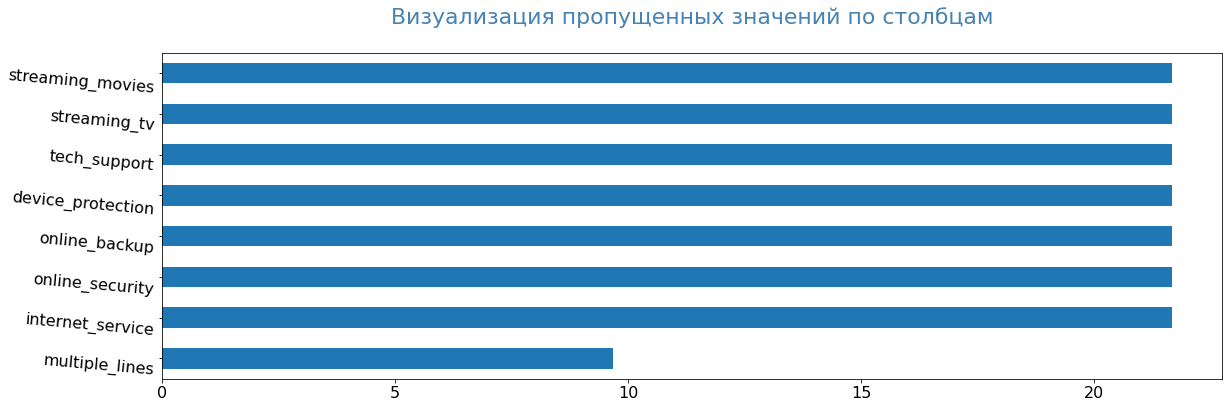

In [34]:
# визуализация пропущенных значений

def pass_value_barh(df):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Визуализация пропущенных значений по столбцам' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось')

pass_value_barh(data)

In [35]:
# проверка уникальных значений столбца end_date
data['end_date'].unique()

array(['No', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
       '2019-10-01 00:00:00', '2020-01-01 00:00:00'], dtype=object)

По итогам анализа видно, что в 8 столбцах из 20 есть пропуски в данных. 

Кроме того существенная часть данных в столбце с датой 'end_date' заполнена не датой, а словом. Для целей построения модели признаки с датой начала и окончания обслуживания не будут использоваться (будут удалены), так как модель будет ориентироваться только на них и это исказит правдивость предсказаний. Но для целей исследовательского анализа необходимо привести данные в столбце end_date к единообразию. С одной стороны некорретно заполнять дату ухода по действующим клиентам. В процессе анализа я пробовала заменить значение 'No' на 'np.NaN', но для построения графиков пропуски могут выдавать ошибки. С другой стороны по действующим клиентам дату ухода можно заполнить какой-то датой из далекого будущего. Но опять же для отображения наглядности графиков это оказался не самый удобный вариант. Поэтому путем экспериментов для целей проведения исследовательского анализа было решено заменить значение 'No' на '2020-02-01' - крайнюю дату актуальности данных для анализа.

In [36]:
# заполнение пропущенных значений столбца end_date, изменение на соответствующий тип данных
data.loc[(data['end_date'] == 'No'), 'end_date'] = '2020-02-01'
data['end_date'] = pd.to_datetime(data['end_date'], format = '%Y-%m-%dT%H:%M:%S')

Далее посмотрим какие значения содержатся в столбцах с пропусками и указанием типов сервисов. Посмотрим как можно заполнить пропуски.

In [37]:
#вывод уникальных значений столбца
display(data['internet_service'].sort_values().unique())

#вывод количества значений по группам
display(data['internet_service'].value_counts())

array(['DSL', 'Fiber optic', nan], dtype=object)

Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64

In [38]:
# заполнение пропусков заглушкой "не определено" ('Undefined')
data['internet_service'] = data['internet_service'].fillna('Undefined')

В столбце internet_service содержатся два типа подключения и часть пропущенных значений. Для того, чтобы не усреднять и не распределять пропущенные значения по двум типам, заполним пропуски заглушкой "не определено" ('Undefined').

In [39]:
#вывод уникальных значений столбца
display(data['online_security'].sort_values().unique())

#вывод количества значений по группам
display(data['online_security'].value_counts())

array(['No', 'Yes', nan], dtype=object)

No     3498
Yes    2019
Name: online_security, dtype: int64

In [40]:
#вывод уникальных значений столбца
display(data['online_backup'].sort_values().unique())

#вывод количества значений по группам
display(data['online_backup'].value_counts())

array(['No', 'Yes', nan], dtype=object)

No     3088
Yes    2429
Name: online_backup, dtype: int64

In [41]:
#вывод уникальных значений столбца
display(data['device_protection'].sort_values().unique())

#вывод количества значений по группам
display(data['device_protection'].value_counts())

array(['No', 'Yes', nan], dtype=object)

No     3095
Yes    2422
Name: device_protection, dtype: int64

In [42]:
#вывод уникальных значений столбца
display(data['multiple_lines'].sort_values().unique())

#вывод количества значений по группам
display(data['multiple_lines'].value_counts())

array(['No', 'Yes', nan], dtype=object)

No     3390
Yes    2971
Name: multiple_lines, dtype: int64

В остальных столбцах с пропущенными значениями типы значений 'да' и 'нет'. Для целей анализа будем считать, что пропуски это 'нет'.

In [43]:
# заполнение пропусков значением ('No')
data[['online_security', 
      'online_backup', 
      'device_protection', 
      'tech_support', 'streaming_tv', 
      'streaming_movies', 
      'multiple_lines']] = data[['online_security', 
                                 'online_backup', 
                                 'device_protection', 
                                 'tech_support', 
                                 'streaming_tv', 
                                 'streaming_movies', 
                                 'multiple_lines']].fillna('No')

пропусков не осталось


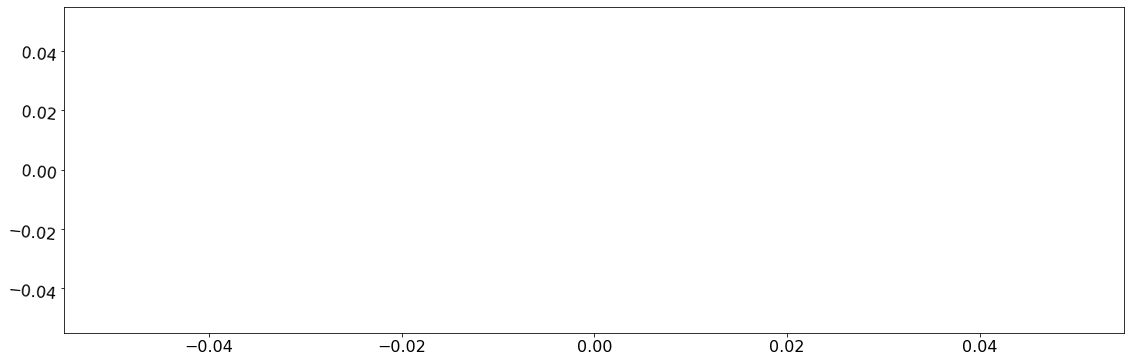

In [44]:
# количество пропущенных значений по столбцам
pass_value_barh(data)

По итогам предобработки данных удалось объединить таблицы в один датасет, заполнить все пропущенные значения, добавить столбец с целевой переменной и привести в соответствие все типы данных.

#### Проверка дубликатов

In [45]:
# проверка на явные дубликаты
data.duplicated().sum()

13

In [46]:
# вывод строк с явными дубликатами
data.loc[data.duplicated(keep=False)].sort_values(by='gender')

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target
customerID,,,,,,,,,,,,,,,,,,,,
2866-IKBTM,Female,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,19.55,19.55,Undefined,No,No,No,No,No,No,No,0
7878-RTCZG,Female,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,19.90,19.90,Undefined,No,No,No,No,No,No,No,0
8605-ITULD,Female,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,19.55,19.55,Undefined,No,No,No,No,No,No,No,0
8375-DKEBR,Female,1,No,No,2019-12-01,2020-01-01,Month-to-month,Yes,Electronic check,69.60,69.60,Fiber optic,No,No,No,No,No,No,No,1
7721-DVEKZ,Female,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,19.65,19.65,Undefined,No,No,No,No,No,No,No,0
2636-ALXXZ,Female,1,No,No,2019-12-01,2020-01-01,Month-to-month,Yes,Electronic check,69.60,69.60,Fiber optic,No,No,No,No,No,No,No,1
0970-QXPXW,Female,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,19.65,19.65,Undefined,No,No,No,No,No,No,No,0
6654-QGBZZ,Female,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,19.90,19.90,Undefined,No,No,No,No,No,No,No,0
6380-ARCEH,Male,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Mailed check,20.20,20.20,Undefined,No,No,No,No,No,No,No,0


После объединения таблиц появилось 13 потенциальных дубликатов. После вывода строк с дубликатами и их анализом, можно сделать вывод, что это похожие данные, но клиенты разные (по customer_id). Это не дубликаты, а совпадение по полу, тарифам и затратам.

## Исследовательский анализ данных

Исследуем отдельно основные параметры данных по клиентам, услугам, годам. Построим графики зависимостей и распределения значений. Построим матрицу корреляции. Найдем зависимости и/или их отсутствие. Определимся с признаками для построения моделей.

#### Визуализация данных и анализ взаимосвязей

Из столбцов с датами выделим года и создадим новый расчетный столбец с периодом пользования данными в днях. Эти данные понадобятся для проведения исследовательского анализа.

In [47]:
# создание нового столбца begin_year
data['begin_year'] = pd.DatetimeIndex(data['begin_date']).year

In [48]:
# создание нового столбца begin_year
data['end_year'] = pd.DatetimeIndex(data['end_date']).year

In [49]:
# создание нового столбца 'period_of_use' с расчетом периода пользования услугами
data['period_of_use'] = (pd.to_datetime(data['end_date']) - pd.to_datetime(data['begin_date'])).dt.days
data['period_of_use'] = data['period_of_use'].astype('int')

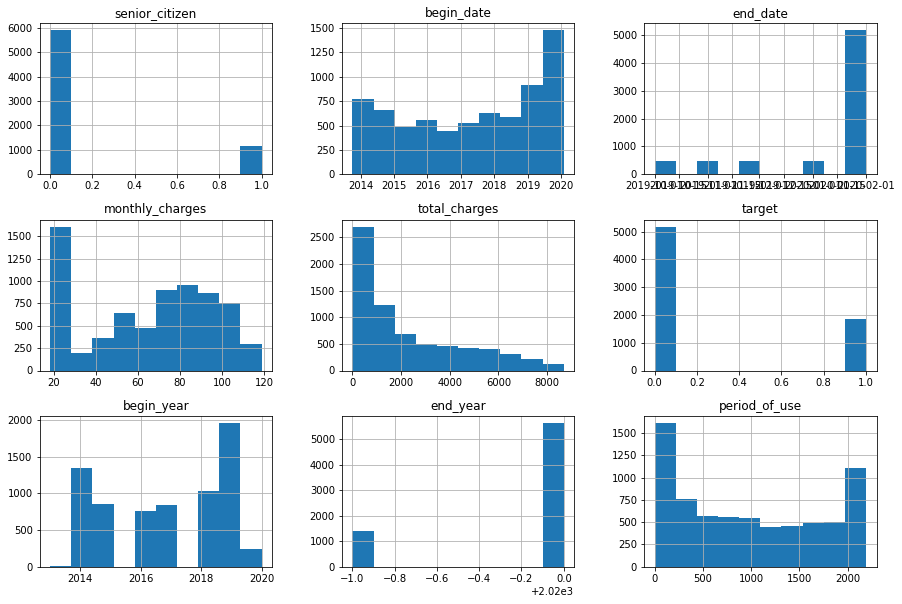

In [50]:
# построение общей гистограммы для всех численных столбцов таблицы
data.hist(figsize=(15, 10));

In [51]:
# описание данных с указанием мин, макс, среднего и персентилей
data.describe(percentiles=[0.05, 1/4, 1/2, 0.80, 0.95, 0.99])

,senior_citizen,monthly_charges,total_charges,target,begin_year,end_year,period_of_use
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,64.761692,2279.734304,0.265370,2016.878603,2019.799943,985.996166
std,0.368612,30.090047,2266.794470,0.441561,1.970573,0.400071,747.587844
min,0.000000,18.250000,0.000000,0.000000,2013.000000,2019.000000,0.000000
5%,0.000000,19.650000,48.600000,0.000000,2014.000000,2019.000000,31.000000
25%,0.000000,35.500000,398.550000,0.000000,2015.000000,2020.000000,273.000000
50%,0.000000,70.350000,1394.550000,0.000000,2017.000000,2020.000000,883.000000
80%,0.000000,94.250000,4471.440000,1.000000,2019.000000,2020.000000,1826.000000
95%,1.000000,107.400000,6921.025000,1.000000,2019.000000,2020.000000,2191.000000
99%,1.000000,114.729000,8039.256000,1.000000,2020.000000,2020.000000,2191.000000


Выше представлены диаграммы распределения данных по численным признакам и описание данных по минмумам, максимумам и средним. 

Бинарные данные 1 и 0 представлены двумя столбцами, это senior_citizen и target. Прослеживается дисбаланс классов, что соответствует сути эти данных и является нормальным.

Столбец total_charges стремится к нормальному распределению данных. Большая часть клиентов имеет общие расходы в объеме до 4000 у.е.

Столбец monthly_charges имеет выбросы в данных. Наблюдается пик количества клиентов по месячным расходам в промежутке от 10 до 30 у.е., а далее спад. Распределение остальных клиентов после спада стремится к нормальному. Предположительно это связано с тем, что часть клиентов пользуется услугами только месяц и не продлевает далее контракт.

По столбцу дата окончания end_date наблюдается существенный рост на 01.02.2020. Это данные по действующим клиентам, которые мы заполнили датой 01.02.2020. Поэтому данный столбец будем анализировать отдельно.

Дата начала использования не имеет нормального распределения. Вероятно подключение к услугам по годам зависит от маркетинговой политики компании и предложений конкурентов.

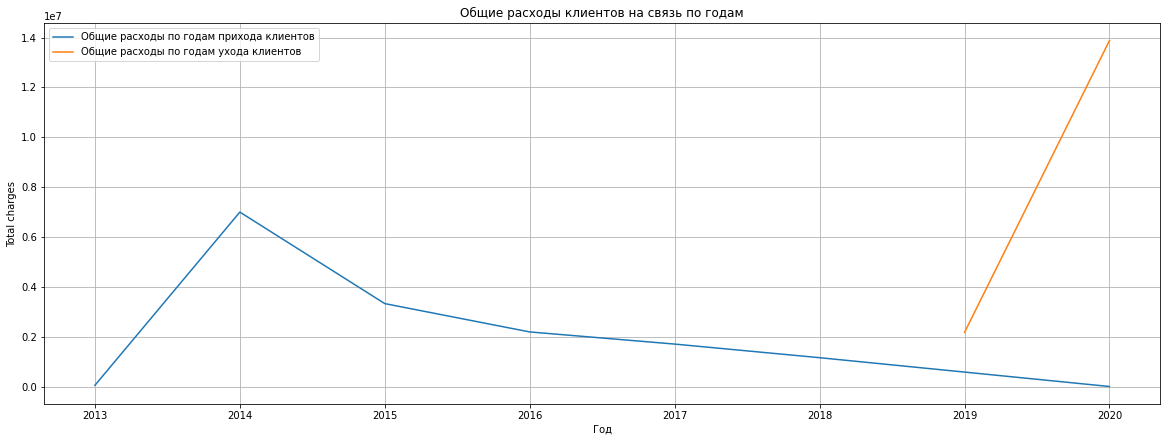

In [52]:
# визуализация величины total_charges (общие расходы клиентов на связь) по годам, линейный график
plt.figure(figsize=(20,7))
plt.plot(data.pivot_table(index='begin_year', values='total_charges', aggfunc='sum'), label = 'Общие расходы по годам прихода клиентов')
plt.plot(data.pivot_table(index='end_year', values='total_charges', aggfunc='sum'), label = 'Общие расходы по годам ухода клиентов')
plt.title('Общие расходы клиентов на связь по годам')
plt.grid()
plt.legend()
plt.xlabel('Год')
plt.ylabel('Total charges')
plt.show()

In [53]:
# описание данных столбца 
data['end_date'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])

/tmp/ipykernel_198/3154368854.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['end_date'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])


count                    7043
unique                      5
top       2020-02-01 00:00:00
freq                     5174
first     2019-10-01 00:00:00
last      2020-02-01 00:00:00
Name: end_date, dtype: object

In [54]:
# описание данных столбца
data['end_year'].describe(percentiles=[0.05, 1/4, 1/2, 0.95, 0.99])

count    7043.000000
mean     2019.799943
std         0.400071
min      2019.000000
5%       2019.000000
25%      2020.000000
50%      2020.000000
95%      2020.000000
99%      2020.000000
max      2020.000000
Name: end_year, dtype: float64

In [55]:
# уникальные значения столбца
data['end_year'].sort_values().unique()

array([2019, 2020])

Наблюдается существенный уход клиентов с 2019-10-01. Данные об уходе есть только за 3 месяца 2019 года и 1 месяц 2020 года. При этом на данном этапе анализа нет информации по какой причине:

- не собирали ранее данные по дате ухода клиентов, а стали собирать только с 01.10.2019,
- появились новые конкуренты или проводилась активная маркетинговая компания у конкурентов, к которым перешла часть клиентов,
- в компании были какие-то изменения или по ценовой политике / тарифам или по маркетинговой стратегии или были технические изменения, которые могли повлечь за собой сбои связи / интернета.

Посмотрим еще есть ли какая-то зависимость от пола ушедшех клиентов.

In [56]:
# создание сводной таблицы по распределению gender по годам
data_gender_release = data.pivot_table(index='gender', values='total_charges', columns = 'end_year', aggfunc='count', fill_value=0, margins=True).reset_index()
data_gender_release = data_gender_release[:-1]
data_gender_release = data_gender_release.rename_axis('index', axis='columns')

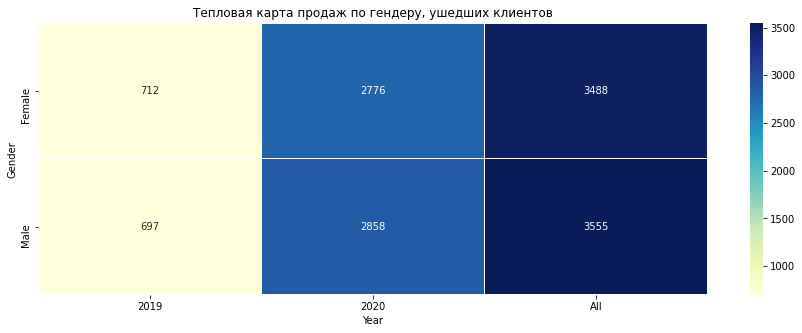

In [57]:
# визуализация распределению gender по годам, построение тепловой карты
plt.figure(figsize=(15, 5))
sns.heatmap(data_gender_release.set_index('gender'), annot=True, fmt='d', cmap='YlGnBu', robust=True, linewidths=.2)
plt.xlabel('Year')
plt.ylabel('Gender')
plt.title('Тепловая карта продаж по гендеру, ушедших клиентов')
plt.show()

Светлые ячейки - мало продаж, яркие ячейки много продаж, темные ячейки - больше всего продаж.

Зависимости ухода от пола клиента не наблюдается.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 800x640 with 0 Axes>

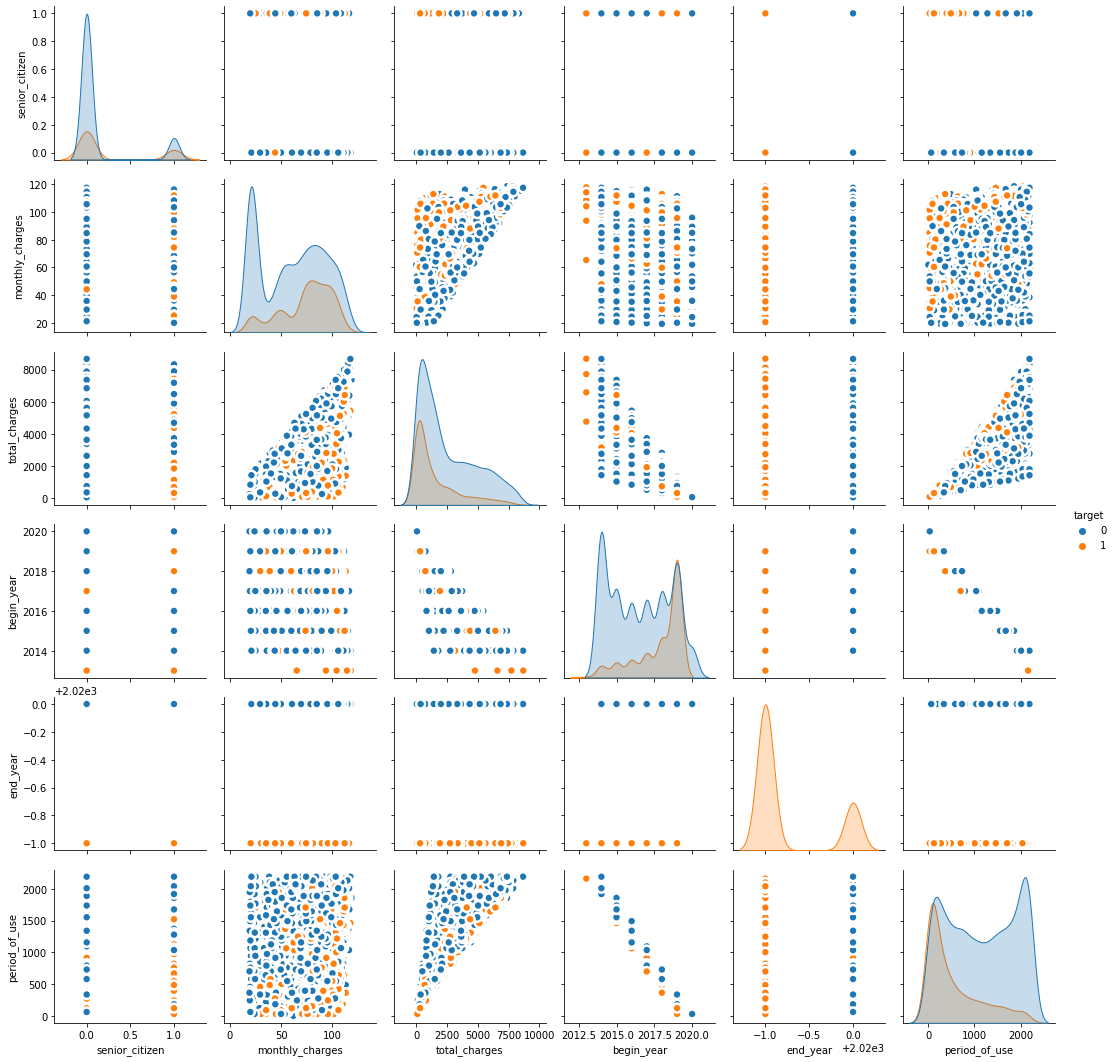

In [58]:
# построение парного графика для выявления взаимосвязи между всеми возможными парами числовых переменных
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(data, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

На графике выше представлена визуализация взаимосвязи между всеми возможными парами числовых переменных. По диагонали на пересечении идет сравнение столбца с самим собой, эти связи не смотрим. На этом графике каких-то явных взаимосвязей и тем более возможных причин ухода клиентов не прослеживается. В выводах компании заказчику будет рекомендовано уточнить дополнительные факторы, внешние и внутренние, которые произошли в компании 01.10.2019.

#### Анализ корреляций

In [59]:
# матрица корреляции количественных факторов 
display(data.corr())

/tmp/ipykernel_198/3818844401.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(data.corr())


,senior_citizen,monthly_charges,total_charges,target,begin_year,end_year,period_of_use
senior_citizen,1.000000,0.220173,0.103006,0.150889,-0.028418,-0.117031,0.016514
monthly_charges,0.220173,1.000000,0.651174,0.193356,-0.264251,-0.171009,0.247754
total_charges,0.103006,0.651174,1.000000,-0.198324,-0.819539,0.161839,0.826109
target,0.150889,0.193356,-0.198324,1.000000,0.291621,-0.832062,-0.352673
begin_year,-0.028418,-0.264251,-0.819539,0.291621,1.000000,-0.235973,-0.987411
end_year,-0.117031,-0.171009,0.161839,-0.832062,-0.235973,1.000000,0.291234
period_of_use,0.016514,0.247754,0.826109,-0.352673,-0.987411,0.291234,1.000000


Выше представлена матрица корреляции числовых признаков. Критичной корреляции не выявлено. Но наблюдается достаточно высокая корреляция между столбцами monthly_charges и total_charges.

Также высокая корреляция между периодом пользования услугой, датой начала и окончания. Для дальнейшего моделирования столбцы с датой будут удалены.

In [60]:
# матрица корреляции качественных факторов с помощью инструмента phik

interval_cols = ['monthly_charges', 'total_charges', 'period_of_use']
phik_overview = data.phik_matrix(interval_cols=interval_cols)

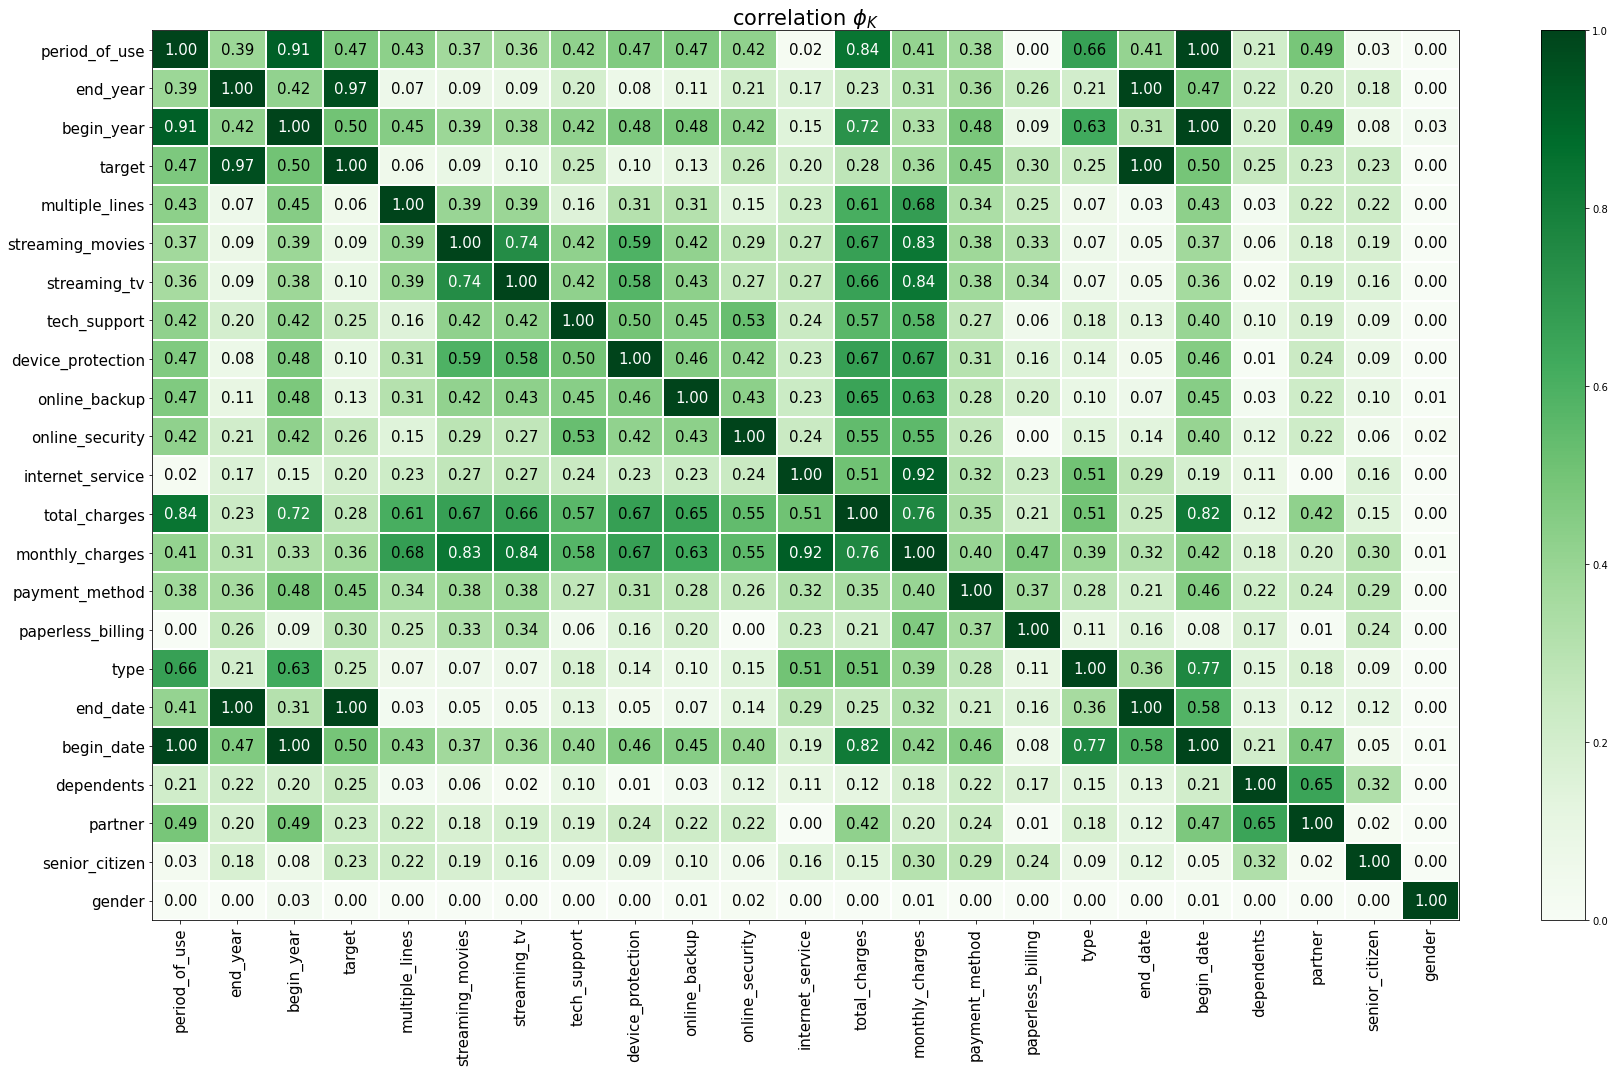

In [61]:
# матрица корреляции качественных факторов с помощью инструмента phik

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(25, 15))
plt.tight_layout()

Также проанализировали матрицу корреляции всех признаков, в том числе категориальных.

В дополнение к предыдущему наблюдению наблюдается довольно высокая взаимосвязь между признками partner и dependents, total_charges и begin_date, type и begin_date. Столбцы с датой будут удалены.

#### Выбор признаков для моделирования

Так как мы не выявили взаимосвязи ушедших клиентов от пола удалим столбец gender.

Столбец dependents коррелировал со столбцом partner. Также удалим его.

Удалим все столбцы с датой, чтобы они не коррелировали с целевой переменной. Кроме периода использования.

In [62]:
# удаление признаков, неучаствующих в моделировании
del data['gender'], data ['dependents'], data['begin_date'], data['end_date'], data['partner'], data['begin_year'], data['end_year']

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   senior_citizen     7043 non-null   int64  
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   internet_service   7043 non-null   object 
 7   online_security    7043 non-null   object 
 8   online_backup      7043 non-null   object 
 9   device_protection  7043 non-null   object 
 10  tech_support       7043 non-null   object 
 11  streaming_tv       7043 non-null   object 
 12  streaming_movies   7043 non-null   object 
 13  multiple_lines     7043 non-null   object 
 14  target             7043 non-null   int64  
 15  period_of_use      7043 non-null   int64  
dtypes: float64(2),

In [64]:
data.sample(5)

,senior_citizen,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,target,period_of_use
customerID,,,,,,,,,,,,,,,,
7274-CGTOD,0,Two year,Yes,Bank transfer (automatic),43.70,2618.30,DSL,Yes,Yes,Yes,Yes,No,No,No,0,1888
7657-DYEPJ,1,One year,Yes,Credit card (automatic),70.15,2497.35,DSL,No,Yes,Yes,Yes,Yes,No,No,1,1156
1897-RCFUM,0,One year,Yes,Mailed check,24.20,914.60,Undefined,No,No,No,No,No,No,Yes,0,1187
5546-BYZSM,0,Month-to-month,No,Electronic check,20.45,775.60,Undefined,No,No,No,No,No,No,No,0,1248
1261-FWTTE,1,Month-to-month,Yes,Bank transfer (automatic),34.65,768.45,DSL,No,No,No,No,No,Yes,No,0,702


## Подготовка данных к моделированию

В качестве подготовки данных необходимо выделить целевую переменную и признаки. Далее привести к единому масштабу числовые признаки и обработать (унифицировать) категориальные признаки.

#### Создание признаков и целевой переменной, разделение на обучающую и тестовую выборки

In [65]:
# создание переменных с признаками
features = data.drop(['target'], axis=1)
target = data['target']

In [66]:
# проверка уникальных значений таргета
data['target'].unique()

array([0, 1])

In [67]:
# проверка уникальных значений таргета
target.unique()

array([0, 1])

Text(0, 0.5, 'Количество')

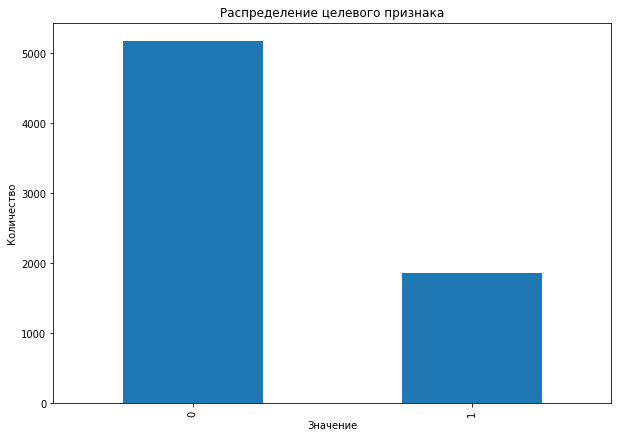

In [68]:
# проверка на дисбаланс целевого класса

fig, ax = plt.subplots(1)
data['target'].value_counts().plot(kind='bar', figsize=(10,7), ax=ax)
ax.set_title('Распределение целевого признака')
ax.set_xlabel('Значение')
ax.set_ylabel('Количество')

Наблюдается дисбаланс целевого признака: действующих клиентов больше ушедших в пропорции 73:26. Метрика оценки качества модели ROC-AUC нечувствительна к дисбалансу, поэтому принято решение не балансировать классы.

При разделении данных на выборки будет применяться стратификация.

In [69]:
# разделение на 2 части: выборки 75% (обучающая) и 25% (тестовая)
features_train, features_test, target_train, target_test = train_test_split(features, target, stratify=target, test_size=0.25, random_state=RANDOM_STATE)

In [70]:
# проверка размера обучающей выборки
features_train.shape

(5282, 15)

In [71]:
# проверка размера тестовой выборки
features_test.shape

(1761, 15)

In [72]:
# проверка размера целевой переменной в обучающей выборке
target_train.shape

(5282,)

In [73]:
# проверка размера целевой переменной в тестовой выборке
target_test.shape

(1761,)

#### Скалирование

Далее необходимо стандартизировать количественные признаки. Применим один из методов масштабирования — стандартизация данных. В sklearn есть отдельная структура для стандартизации данных — StandardScaler.

In [74]:
# создание объекта структуры StandardScaler()
scaler = StandardScaler()
# список всех численных признаков
numeric = ['monthly_charges', 'total_charges', 'period_of_use']
# настройка объекта на обучающих данных
scaler.fit(features_train[numeric]) 

StandardScaler()

In [75]:
# сохранение преобразованных обучающуюб валидационную и тестовую выборки в переменных
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# вывод на экран первые пять строк таблицы
features_train.head()

/tmp/ipykernel_198/3991396666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/tmp/ipykernel_198/3991396666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])


,senior_citizen,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,period_of_use
customerID,,,,,,,,,,,,,,,
9279-CJEOJ,1,Month-to-month,Yes,Bank transfer (automatic),1.018224,-0.111394,Fiber optic,No,No,No,No,Yes,Yes,Yes,-0.460168
3374-TTZTK,0,Two year,Yes,Electronic check,1.380622,1.413950,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No,0.801638
7688-AWMDX,0,Two year,No,Bank transfer (automatic),-0.341600,0.661037,DSL,Yes,No,No,Yes,No,No,No,1.576383
6198-PNNSZ,0,One year,No,Bank transfer (automatic),1.496988,1.688295,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Yes,0.964883
4213-HKBJO,0,Two year,No,Credit card (automatic),-1.299129,-0.639684,Undefined,No,No,No,No,No,No,Yes,0.028230


#### Кодирование признаков

Следующим этапом необходимо унифицировать категориальрные признаки. Для этого есть несколько способов кодирования и обработки.

Для линейных моделей (Линейная регрессия, Логистическая регрессиия) лучше всего подходит интрумент OHE (OneHotEncoder).

Для деревянных моделей (Дерево решений, Случайный лес) более подходящим является интрумент OE (OrdinalEncoder).

В модели CatBoost используется встроенный кодировщик, дополнительное кодирование категориальных признаков не требуется.

Для построения модели прогнозирования оттока клиентов мы будем использовать несколько моделей и выбирать из них оптимальную по метрике качества roc-auc. Сравнивать будем модель Логистической регрессии, модель Случайного леса и две бустинговые модели (CatBoost и LightGBM). В связи с этим мы будем два раза кодировать данные двумя инструментами и для каждой модели использовать свой инструмент.

In [76]:
# список категориальных признаков и присвоение им переменной cat_features
cat_features = ['senior_citizen', 'type', 'paperless_billing', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']

In [77]:
# обработка категориальных признаков для модели Случайный лес и LGBM с помощью OrdinalEncoder

features_train_oe = features_train.copy()
features_test_oe = features_test.copy()

category_features_oe = cat_features

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', dtype='int', unknown_value=-1)
encoder.fit(features_train_oe[category_features_oe])
features_train_oe[category_features_oe] = encoder.transform(features_train_oe[category_features_oe])
features_test_oe[category_features_oe] = encoder.transform(features_test_oe[category_features_oe])

features_train_oe.head()


,senior_citizen,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,period_of_use
customerID,,,,,,,,,,,,,,,
9279-CJEOJ,1,0,1,0,1.018224,-0.111394,1,0,0,0,0,1,1,1,-0.460168
3374-TTZTK,0,2,1,2,1.380622,1.413950,1,1,1,1,1,1,1,0,0.801638
7688-AWMDX,0,2,0,0,-0.341600,0.661037,0,1,0,0,1,0,0,0,1.576383
6198-PNNSZ,0,1,0,0,1.496988,1.688295,1,1,1,1,0,1,1,1,0.964883
4213-HKBJO,0,2,0,1,-1.299129,-0.639684,2,0,0,0,0,0,0,1,0.028230


In [78]:
# обработка категориальных признаков для модели Логистической регресии с помощью OHE

features_train_ohe = features_train.copy()
features_test_ohe = features_test.copy()

category_features_ohe = cat_features

OHE = OneHotEncoder(handle_unknown='ignore', sparse=False)
OHE.fit(features_train_ohe[category_features_ohe])
ohe_col_names = OHE.get_feature_names()
features_train_ohe[ohe_col_names] = OHE.transform(features_train_ohe[category_features_ohe])
features_train_ohe.drop(columns=category_features_ohe, inplace=True)
features_test_ohe[ohe_col_names] = OHE.transform(features_test_ohe[category_features_ohe])
features_test_ohe.drop(columns=category_features_ohe, inplace=True)

features_train_ohe.head()

,monthly_charges,total_charges,period_of_use,x0_0,x0_1,x1_Month-to-month,x1_One year,x1_Two year,x2_No,x2_Yes,...,x7_No,x7_Yes,x8_No,x8_Yes,x9_No,x9_Yes,x10_No,x10_Yes,x11_No,x11_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
9279-CJEOJ,1.018224,-0.111394,-0.460168,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3374-TTZTK,1.380622,1.413950,0.801638,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
7688-AWMDX,-0.341600,0.661037,1.576383,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
6198-PNNSZ,1.496988,1.688295,0.964883,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4213-HKBJO,-1.299129,-0.639684,0.028230,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Анализ моделей

В качестве анализа будем использовать два типа моделей: простые и бустинг.

Простые модели: Логистическкая регрессиия и Случайный лес.

Бустинг: LightGBM и CatBoost

#### Логистическая регрессия

In [79]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 1500, 2000]}

In [80]:
%%time

# обучение модели логистической регресии, расчет метрики качества

model_lr = LogisticRegression(solver='lbfgs')
grid_lr = GridSearchCV(model_lr, parameters, cv=3, scoring='roc_auc')
grid_lr.fit(features_train_ohe, target_train)
print(grid_lr.best_params_)
print(grid_lr.best_score_)

{'C': 1000}
0.8447472876677452
CPU times: user 9.99 s, sys: 28.3 s, total: 38.3 s
Wall time: 39.3 s


In [81]:
# вывод результатов
results = pd.DataFrame(grid_lr.cv_results_)
display(results[results['rank_test_score'] == 1])
fit_time_lr = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_lr = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time_lr: {fit_time_lr}, predict_time_lr: {predict_time_lr}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,1.062777,0.252304,0.036249,0.036022,1000,{'C': 1000},0.830457,0.842907,0.860878,0.844747,0.012487,1


Fit_time_lr: 1.0627765655517578, predict_time_lr: 0.036249240239461265


#### Случайный лес

In [82]:
parameters = {'max_depth':range(2, 10, 2), 'n_estimators':[100, 200, 300]}

In [83]:
%%time
# расчет с помощью модели RandomForestClassifier
# обучение модели

model_rfc = RandomForestClassifier(random_state=RANDOM_STATE)
grid_rfc = GridSearchCV(model_rfc, parameters, cv=3, scoring='roc_auc')
grid_rfc.fit(features_train_oe, target_train)
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 8, 'n_estimators': 300}
0.8604315627439544
CPU times: user 20.4 s, sys: 158 ms, total: 20.6 s
Wall time: 23.7 s


In [84]:
# вывод результатов
results = pd.DataFrame(grid_rfc.cv_results_)
display(results[results['rank_test_score'] == 1])
fit_time_rfc = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_rfc = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time: {fit_time_rfc}, predict_time: {predict_time_rfc}')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,0.824161,0.013025,0.0962,0.00066,8,300,"{'max_depth': 8, 'n_estimators': 300}",0.854992,0.853028,0.873274,0.860432,0.009116,1


Fit_time: 0.8241607348124186, predict_time: 0.09620038668314616


#### CatBoost

In [85]:
parameters_cbc = {'learning_rate': [0.03, 0.1, 0.3],'iterations': [100, 150, 200],'depth': range(5,10,2)}

In [86]:
%%time
# обучение модели CatBoostClassifier

model_cbc = CatBoostClassifier(loss_function='Logloss', cat_features=cat_features, random_seed=RANDOM_STATE)
grid_cbc = GridSearchCV(model_cbc, parameters_cbc, cv=3, scoring='roc_auc')
grid_cbc.fit(features_train, target_train)
print(grid_cbc.best_params_)
print(grid_cbc.best_score_)

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6819804	total: 52.3ms	remaining: 5.18s
1:	learn: 0.6712418	total: 54.3ms	remaining: 2.66s
2:	learn: 0.6612556	total: 56.3ms	remaining: 1.82s
3:	learn: 0.6526160	total: 58.4ms	remaining: 1.4s
4:	learn: 0.6428021	total: 60.1ms	remaining: 1.14s
5:	learn: 0.6338006	total: 61.9ms	remaining: 969ms
6:	learn: 0.6249436	total: 63.7ms	remaining: 846ms
7:	learn: 0.6169341	total: 65.4ms	remaining: 752ms
8:	learn: 0.6093217	total: 67.1ms	remaining: 678ms
9:	learn: 0.6019858	total: 68.9ms	remaining: 621ms
10:	learn: 0.5950664	total: 70.7ms	remaining: 572ms
11:	learn: 0.5889159	total: 72.5ms	remaining: 531ms
12:	learn: 0.5830367	total: 73.8ms	remaining: 494ms
13:	learn: 0.5765135	total: 75.5ms	remaining: 464ms
14:	learn: 0.5701498	total: 77.5ms	remaining: 439ms
15:	learn: 0.5645044	total: 79.2ms	remaining: 416ms
16:	learn: 0.5591367	total: 81ms	remaining: 395ms
17:	learn: 0.5539063	total: 82.7ms	remaining: 377ms
18:	learn: 0.5486692	total: 84.6ms	remaining: 361ms
19:	learn: 0.5441540	tota

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6822174	total: 3.04ms	remaining: 300ms
1:	learn: 0.6717637	total: 5.15ms	remaining: 252ms
2:	learn: 0.6620153	total: 7.14ms	remaining: 231ms
3:	learn: 0.6529905	total: 8.94ms	remaining: 215ms
4:	learn: 0.6430025	total: 10.8ms	remaining: 205ms
5:	learn: 0.6342565	total: 12.8ms	remaining: 200ms
6:	learn: 0.6260593	total: 15.6ms	remaining: 207ms
7:	learn: 0.6181841	total: 17.6ms	remaining: 202ms
8:	learn: 0.6108038	total: 19.4ms	remaining: 196ms
9:	learn: 0.6036088	total: 21.1ms	remaining: 189ms
10:	learn: 0.5964109	total: 22.8ms	remaining: 185ms
11:	learn: 0.5893610	total: 24.6ms	remaining: 181ms
12:	learn: 0.5836848	total: 26ms	remaining: 174ms
13:	learn: 0.5773714	total: 27.8ms	remaining: 171ms
14:	learn: 0.5714622	total: 29.7ms	remaining: 168ms
15:	learn: 0.5656579	total: 31.5ms	remaining: 165ms
16:	learn: 0.5602161	total: 33.5ms	remaining: 163ms
17:	learn: 0.5545756	total: 35.3ms	remaining: 161ms
18:	learn: 0.5497043	total: 37.6ms	remaining: 160ms
19:	learn: 0.5451733	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6823131	total: 2.36ms	remaining: 234ms
1:	learn: 0.6721910	total: 4.71ms	remaining: 231ms
2:	learn: 0.6632715	total: 6.59ms	remaining: 213ms
3:	learn: 0.6540712	total: 8.52ms	remaining: 205ms
4:	learn: 0.6452968	total: 10.5ms	remaining: 200ms
5:	learn: 0.6372381	total: 12.4ms	remaining: 194ms
6:	learn: 0.6292535	total: 14.7ms	remaining: 195ms
7:	learn: 0.6210513	total: 17.7ms	remaining: 203ms
8:	learn: 0.6133111	total: 20.8ms	remaining: 210ms
9:	learn: 0.6057658	total: 23.1ms	remaining: 208ms
10:	learn: 0.5992111	total: 25.6ms	remaining: 207ms
11:	learn: 0.5927681	total: 28.2ms	remaining: 207ms
12:	learn: 0.5865715	total: 30.6ms	remaining: 205ms
13:	learn: 0.5804552	total: 33.2ms	remaining: 204ms
14:	learn: 0.5753678	total: 35ms	remaining: 199ms
15:	learn: 0.5698769	total: 37.3ms	remaining: 196ms
16:	learn: 0.5650602	total: 39.2ms	remaining: 191ms
17:	learn: 0.5602977	total: 41.1ms	remaining: 187ms
18:	learn: 0.5560430	total: 43.1ms	remaining: 184ms
19:	learn: 0.5518126	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6571973	total: 2.37ms	remaining: 235ms
1:	learn: 0.6278135	total: 4.45ms	remaining: 218ms
2:	learn: 0.6025400	total: 6.55ms	remaining: 212ms
3:	learn: 0.5815586	total: 8.61ms	remaining: 207ms
4:	learn: 0.5618422	total: 10.4ms	remaining: 198ms
5:	learn: 0.5442473	total: 12.4ms	remaining: 194ms
6:	learn: 0.5281053	total: 14.3ms	remaining: 190ms
7:	learn: 0.5148281	total: 16.1ms	remaining: 186ms
8:	learn: 0.5035182	total: 17.5ms	remaining: 177ms
9:	learn: 0.4917913	total: 19.4ms	remaining: 175ms
10:	learn: 0.4828894	total: 21.3ms	remaining: 172ms
11:	learn: 0.4740517	total: 24.4ms	remaining: 179ms
12:	learn: 0.4656525	total: 26.7ms	remaining: 179ms
13:	learn: 0.4583482	total: 29.9ms	remaining: 184ms
14:	learn: 0.4524482	total: 33.1ms	remaining: 187ms
15:	learn: 0.4464389	total: 36.3ms	remaining: 190ms
16:	learn: 0.4416960	total: 39.3ms	remaining: 192ms
17:	learn: 0.4366972	total: 42.3ms	remaining: 193ms
18:	learn: 0.4321765	total: 45.3ms	remaining: 193ms
19:	learn: 0.4275520	t

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6579585	total: 2.46ms	remaining: 244ms
1:	learn: 0.6275216	total: 4.97ms	remaining: 243ms
2:	learn: 0.6024372	total: 7.51ms	remaining: 243ms
3:	learn: 0.5822330	total: 9.68ms	remaining: 232ms
4:	learn: 0.5606663	total: 11.7ms	remaining: 223ms
5:	learn: 0.5439143	total: 13.9ms	remaining: 218ms
6:	learn: 0.5295958	total: 16.3ms	remaining: 217ms
7:	learn: 0.5160194	total: 18.4ms	remaining: 211ms
8:	learn: 0.5028591	total: 20.2ms	remaining: 204ms
9:	learn: 0.4921948	total: 22.6ms	remaining: 203ms
10:	learn: 0.4816236	total: 24.6ms	remaining: 199ms
11:	learn: 0.4721798	total: 26.5ms	remaining: 195ms
12:	learn: 0.4651851	total: 28.9ms	remaining: 194ms
13:	learn: 0.4572912	total: 31ms	remaining: 190ms
14:	learn: 0.4506010	total: 33.5ms	remaining: 190ms
15:	learn: 0.4441685	total: 36ms	remaining: 189ms
16:	learn: 0.4400975	total: 37.8ms	remaining: 185ms
17:	learn: 0.4362105	total: 40.2ms	remaining: 183ms
18:	learn: 0.4318987	total: 42.8ms	remaining: 183ms
19:	learn: 0.4281868	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6582485	total: 2.25ms	remaining: 223ms
1:	learn: 0.6293845	total: 4.6ms	remaining: 226ms
2:	learn: 0.6060028	total: 6.73ms	remaining: 218ms
3:	learn: 0.5849449	total: 8.57ms	remaining: 206ms
4:	learn: 0.5670373	total: 10.5ms	remaining: 199ms
5:	learn: 0.5499557	total: 12.3ms	remaining: 193ms
6:	learn: 0.5345913	total: 15.5ms	remaining: 206ms
7:	learn: 0.5215556	total: 18.1ms	remaining: 208ms
8:	learn: 0.5100326	total: 20.8ms	remaining: 210ms
9:	learn: 0.4999590	total: 23.4ms	remaining: 210ms
10:	learn: 0.4910668	total: 25.8ms	remaining: 209ms
11:	learn: 0.4841072	total: 27.7ms	remaining: 203ms
12:	learn: 0.4769594	total: 29.4ms	remaining: 197ms
13:	learn: 0.4707436	total: 31.2ms	remaining: 192ms
14:	learn: 0.4632898	total: 33.4ms	remaining: 189ms
15:	learn: 0.4590102	total: 34.4ms	remaining: 180ms
16:	learn: 0.4539615	total: 36.2ms	remaining: 177ms
17:	learn: 0.4491244	total: 38.2ms	remaining: 174ms
18:	learn: 0.4446197	total: 40.1ms	remaining: 171ms
19:	learn: 0.4407995	to

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5960887	total: 2.49ms	remaining: 246ms
1:	learn: 0.5362293	total: 4.55ms	remaining: 223ms
2:	learn: 0.4955537	total: 6.55ms	remaining: 212ms
3:	learn: 0.4682707	total: 8.16ms	remaining: 196ms
4:	learn: 0.4488584	total: 10.5ms	remaining: 199ms
5:	learn: 0.4364089	total: 12.4ms	remaining: 194ms
6:	learn: 0.4241857	total: 14.1ms	remaining: 188ms
7:	learn: 0.4157457	total: 16.2ms	remaining: 186ms
8:	learn: 0.4088979	total: 18.2ms	remaining: 184ms
9:	learn: 0.4035035	total: 20ms	remaining: 180ms
10:	learn: 0.3998243	total: 21.8ms	remaining: 176ms
11:	learn: 0.3955780	total: 23.6ms	remaining: 173ms
12:	learn: 0.3922622	total: 25.5ms	remaining: 171ms
13:	learn: 0.3891943	total: 27.4ms	remaining: 168ms
14:	learn: 0.3867913	total: 29.4ms	remaining: 166ms
15:	learn: 0.3845292	total: 31.1ms	remaining: 163ms
16:	learn: 0.3825889	total: 33ms	remaining: 161ms
17:	learn: 0.3815985	total: 34.9ms	remaining: 159ms
18:	learn: 0.3806036	total: 36.8ms	remaining: 157ms
19:	learn: 0.3784231	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5981249	total: 2.21ms	remaining: 219ms
1:	learn: 0.5426315	total: 4.24ms	remaining: 208ms
2:	learn: 0.5014193	total: 6.35ms	remaining: 205ms
3:	learn: 0.4711289	total: 8.25ms	remaining: 198ms
4:	learn: 0.4497452	total: 10.1ms	remaining: 191ms
5:	learn: 0.4370733	total: 11.9ms	remaining: 186ms
6:	learn: 0.4228236	total: 13.7ms	remaining: 182ms
7:	learn: 0.4167488	total: 15.6ms	remaining: 180ms
8:	learn: 0.4092341	total: 17.6ms	remaining: 178ms
9:	learn: 0.4039287	total: 19.6ms	remaining: 176ms
10:	learn: 0.4000216	total: 21.3ms	remaining: 173ms
11:	learn: 0.3959876	total: 23.2ms	remaining: 170ms
12:	learn: 0.3939722	total: 25ms	remaining: 167ms
13:	learn: 0.3912044	total: 26.8ms	remaining: 165ms
14:	learn: 0.3905459	total: 28.7ms	remaining: 162ms
15:	learn: 0.3862069	total: 30.4ms	remaining: 160ms
16:	learn: 0.3848632	total: 31.6ms	remaining: 154ms
17:	learn: 0.3823543	total: 33.5ms	remaining: 153ms
18:	learn: 0.3806017	total: 35.6ms	remaining: 152ms
19:	learn: 0.3794445	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5987602	total: 2.25ms	remaining: 223ms
1:	learn: 0.5426034	total: 4.47ms	remaining: 219ms
2:	learn: 0.5080297	total: 7.18ms	remaining: 232ms
3:	learn: 0.4771844	total: 9.64ms	remaining: 231ms
4:	learn: 0.4596802	total: 11.6ms	remaining: 221ms
5:	learn: 0.4438513	total: 13.1ms	remaining: 205ms
6:	learn: 0.4316185	total: 15ms	remaining: 199ms
7:	learn: 0.4237300	total: 16.8ms	remaining: 193ms
8:	learn: 0.4180544	total: 18.2ms	remaining: 184ms
9:	learn: 0.4117860	total: 20.2ms	remaining: 182ms
10:	learn: 0.4077361	total: 22.1ms	remaining: 179ms
11:	learn: 0.4047752	total: 23.8ms	remaining: 175ms
12:	learn: 0.3994622	total: 25.9ms	remaining: 174ms
13:	learn: 0.3972557	total: 27.9ms	remaining: 171ms
14:	learn: 0.3954361	total: 29.7ms	remaining: 168ms
15:	learn: 0.3941969	total: 31.5ms	remaining: 165ms
16:	learn: 0.3930166	total: 32.9ms	remaining: 161ms
17:	learn: 0.3915677	total: 34.9ms	remaining: 159ms
18:	learn: 0.3901293	total: 36.9ms	remaining: 157ms
19:	learn: 0.3896641	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6819804	total: 2.29ms	remaining: 341ms
1:	learn: 0.6712418	total: 4.38ms	remaining: 324ms
2:	learn: 0.6612556	total: 6.24ms	remaining: 306ms
3:	learn: 0.6526160	total: 8.13ms	remaining: 297ms
4:	learn: 0.6428021	total: 9.91ms	remaining: 287ms
5:	learn: 0.6338006	total: 11.7ms	remaining: 281ms
6:	learn: 0.6249436	total: 13.5ms	remaining: 277ms
7:	learn: 0.6169341	total: 15.3ms	remaining: 271ms
8:	learn: 0.6093217	total: 17ms	remaining: 267ms
9:	learn: 0.6019858	total: 18.8ms	remaining: 263ms
10:	learn: 0.5950664	total: 20.6ms	remaining: 260ms
11:	learn: 0.5889159	total: 22.4ms	remaining: 257ms
12:	learn: 0.5830367	total: 23.6ms	remaining: 249ms
13:	learn: 0.5765135	total: 25.4ms	remaining: 247ms
14:	learn: 0.5701498	total: 27.2ms	remaining: 245ms
15:	learn: 0.5645044	total: 28.9ms	remaining: 242ms
16:	learn: 0.5591367	total: 30.7ms	remaining: 240ms
17:	learn: 0.5539063	total: 32.6ms	remaining: 239ms
18:	learn: 0.5486692	total: 34.6ms	remaining: 238ms
19:	learn: 0.5441540	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6822174	total: 2.54ms	remaining: 378ms
1:	learn: 0.6717637	total: 4.67ms	remaining: 346ms
2:	learn: 0.6620153	total: 6.79ms	remaining: 333ms
3:	learn: 0.6529905	total: 8.86ms	remaining: 324ms
4:	learn: 0.6430025	total: 10.8ms	remaining: 312ms
5:	learn: 0.6342565	total: 12.7ms	remaining: 305ms
6:	learn: 0.6260593	total: 15.1ms	remaining: 308ms
7:	learn: 0.6181841	total: 17.6ms	remaining: 312ms
8:	learn: 0.6108038	total: 20ms	remaining: 313ms
9:	learn: 0.6036088	total: 21.9ms	remaining: 307ms
10:	learn: 0.5964109	total: 23.9ms	remaining: 302ms
11:	learn: 0.5893610	total: 25.8ms	remaining: 297ms
12:	learn: 0.5836848	total: 28.1ms	remaining: 296ms
13:	learn: 0.5773714	total: 30.9ms	remaining: 300ms
14:	learn: 0.5714622	total: 33.3ms	remaining: 300ms
15:	learn: 0.5656579	total: 35.3ms	remaining: 296ms
16:	learn: 0.5602161	total: 37.2ms	remaining: 291ms
17:	learn: 0.5545756	total: 39.2ms	remaining: 288ms
18:	learn: 0.5497043	total: 41.2ms	remaining: 284ms
19:	learn: 0.5451733	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6823131	total: 2.73ms	remaining: 407ms
1:	learn: 0.6721910	total: 4.94ms	remaining: 365ms
2:	learn: 0.6632715	total: 7.04ms	remaining: 345ms
3:	learn: 0.6540712	total: 8.94ms	remaining: 326ms
4:	learn: 0.6452968	total: 10.8ms	remaining: 314ms
5:	learn: 0.6372381	total: 12.7ms	remaining: 305ms
6:	learn: 0.6292535	total: 14.6ms	remaining: 299ms
7:	learn: 0.6210513	total: 16.5ms	remaining: 293ms
8:	learn: 0.6133111	total: 18.4ms	remaining: 288ms
9:	learn: 0.6057658	total: 20.4ms	remaining: 286ms
10:	learn: 0.5992111	total: 22.3ms	remaining: 282ms
11:	learn: 0.5927681	total: 24.3ms	remaining: 280ms
12:	learn: 0.5865715	total: 26.3ms	remaining: 277ms
13:	learn: 0.5804552	total: 28.2ms	remaining: 274ms
14:	learn: 0.5753678	total: 29.7ms	remaining: 267ms
15:	learn: 0.5698769	total: 31.7ms	remaining: 266ms
16:	learn: 0.5650602	total: 33.5ms	remaining: 262ms
17:	learn: 0.5602977	total: 35.6ms	remaining: 261ms
18:	learn: 0.5560430	total: 37.5ms	remaining: 259ms
19:	learn: 0.5518126	t

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6571973	total: 2.27ms	remaining: 339ms
1:	learn: 0.6278135	total: 4.49ms	remaining: 332ms
2:	learn: 0.6025400	total: 6.7ms	remaining: 329ms
3:	learn: 0.5815586	total: 8.7ms	remaining: 318ms
4:	learn: 0.5618422	total: 10.7ms	remaining: 312ms
5:	learn: 0.5442473	total: 12.7ms	remaining: 305ms
6:	learn: 0.5281053	total: 14.7ms	remaining: 300ms
7:	learn: 0.5148281	total: 16.7ms	remaining: 296ms
8:	learn: 0.5035182	total: 17.9ms	remaining: 280ms
9:	learn: 0.4917913	total: 19.9ms	remaining: 278ms
10:	learn: 0.4828894	total: 21.8ms	remaining: 276ms
11:	learn: 0.4740517	total: 23.9ms	remaining: 274ms
12:	learn: 0.4656525	total: 25.3ms	remaining: 267ms
13:	learn: 0.4583482	total: 27.8ms	remaining: 270ms
14:	learn: 0.4524482	total: 30.5ms	remaining: 275ms
15:	learn: 0.4464389	total: 32.5ms	remaining: 272ms
16:	learn: 0.4416960	total: 34.5ms	remaining: 270ms
17:	learn: 0.4366972	total: 36.5ms	remaining: 268ms
18:	learn: 0.4321765	total: 38.6ms	remaining: 266ms
19:	learn: 0.4275520	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6579585	total: 2.73ms	remaining: 407ms
1:	learn: 0.6275216	total: 5.44ms	remaining: 403ms
2:	learn: 0.6024372	total: 7.51ms	remaining: 368ms
3:	learn: 0.5822330	total: 9.75ms	remaining: 356ms
4:	learn: 0.5606663	total: 11.8ms	remaining: 342ms
5:	learn: 0.5439143	total: 13.7ms	remaining: 330ms
6:	learn: 0.5295958	total: 15.8ms	remaining: 322ms
7:	learn: 0.5160194	total: 17.9ms	remaining: 318ms
8:	learn: 0.5028591	total: 20.1ms	remaining: 314ms
9:	learn: 0.4921948	total: 22.8ms	remaining: 319ms
10:	learn: 0.4816236	total: 24.8ms	remaining: 313ms
11:	learn: 0.4721798	total: 27.3ms	remaining: 314ms
12:	learn: 0.4651851	total: 29.4ms	remaining: 310ms
13:	learn: 0.4572912	total: 32ms	remaining: 311ms
14:	learn: 0.4506010	total: 34.1ms	remaining: 307ms
15:	learn: 0.4441685	total: 36.2ms	remaining: 303ms
16:	learn: 0.4400975	total: 38ms	remaining: 297ms
17:	learn: 0.4362105	total: 41.1ms	remaining: 301ms
18:	learn: 0.4318987	total: 44.2ms	remaining: 304ms
19:	learn: 0.4281868	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6582485	total: 3.6ms	remaining: 537ms
1:	learn: 0.6293845	total: 6.88ms	remaining: 509ms
2:	learn: 0.6060028	total: 10.2ms	remaining: 501ms
3:	learn: 0.5849449	total: 13.1ms	remaining: 477ms
4:	learn: 0.5670373	total: 16.2ms	remaining: 470ms
5:	learn: 0.5499557	total: 19.4ms	remaining: 465ms
6:	learn: 0.5345913	total: 22.4ms	remaining: 459ms
7:	learn: 0.5215556	total: 25.6ms	remaining: 454ms
8:	learn: 0.5100326	total: 28.8ms	remaining: 451ms
9:	learn: 0.4999590	total: 31.8ms	remaining: 445ms
10:	learn: 0.4910668	total: 34.8ms	remaining: 440ms
11:	learn: 0.4841072	total: 37.7ms	remaining: 434ms
12:	learn: 0.4769594	total: 40.6ms	remaining: 428ms
13:	learn: 0.4707436	total: 43.8ms	remaining: 425ms
14:	learn: 0.4632898	total: 46.9ms	remaining: 422ms
15:	learn: 0.4590102	total: 48.3ms	remaining: 404ms
16:	learn: 0.4539615	total: 51.2ms	remaining: 400ms
17:	learn: 0.4491244	total: 54.1ms	remaining: 396ms
18:	learn: 0.4446197	total: 57ms	remaining: 393ms
19:	learn: 0.4407995	tota

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5960887	total: 2.24ms	remaining: 334ms
1:	learn: 0.5362293	total: 4.35ms	remaining: 322ms
2:	learn: 0.4955537	total: 6.8ms	remaining: 333ms
3:	learn: 0.4682707	total: 8.55ms	remaining: 312ms
4:	learn: 0.4488584	total: 11ms	remaining: 319ms
5:	learn: 0.4364089	total: 15.5ms	remaining: 371ms
6:	learn: 0.4241857	total: 19.8ms	remaining: 405ms
7:	learn: 0.4157457	total: 23.1ms	remaining: 410ms
8:	learn: 0.4088979	total: 27.3ms	remaining: 428ms
9:	learn: 0.4035035	total: 31.6ms	remaining: 443ms
10:	learn: 0.3998243	total: 35.8ms	remaining: 453ms
11:	learn: 0.3955780	total: 39.9ms	remaining: 459ms
12:	learn: 0.3922622	total: 43.5ms	remaining: 459ms
13:	learn: 0.3891943	total: 47.6ms	remaining: 462ms
14:	learn: 0.3867913	total: 51.4ms	remaining: 462ms
15:	learn: 0.3845292	total: 54.6ms	remaining: 457ms
16:	learn: 0.3825889	total: 56.5ms	remaining: 442ms
17:	learn: 0.3815985	total: 58.4ms	remaining: 428ms
18:	learn: 0.3806036	total: 60.4ms	remaining: 416ms
19:	learn: 0.3784231	tota

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5981249	total: 2.43ms	remaining: 363ms
1:	learn: 0.5426315	total: 4.78ms	remaining: 354ms
2:	learn: 0.5014193	total: 7.2ms	remaining: 353ms
3:	learn: 0.4711289	total: 9.6ms	remaining: 351ms
4:	learn: 0.4497452	total: 11.8ms	remaining: 341ms
5:	learn: 0.4370733	total: 13.9ms	remaining: 334ms
6:	learn: 0.4228236	total: 16.1ms	remaining: 330ms
7:	learn: 0.4167488	total: 18.2ms	remaining: 323ms
8:	learn: 0.4092341	total: 20.4ms	remaining: 320ms
9:	learn: 0.4039287	total: 22.5ms	remaining: 315ms
10:	learn: 0.4000216	total: 25.3ms	remaining: 320ms
11:	learn: 0.3959876	total: 27.8ms	remaining: 320ms
12:	learn: 0.3939722	total: 30.5ms	remaining: 322ms
13:	learn: 0.3912044	total: 33.2ms	remaining: 323ms
14:	learn: 0.3905459	total: 35.8ms	remaining: 322ms
15:	learn: 0.3862069	total: 40.6ms	remaining: 340ms
16:	learn: 0.3848632	total: 43.4ms	remaining: 340ms
17:	learn: 0.3823543	total: 48.5ms	remaining: 356ms
18:	learn: 0.3806017	total: 55.4ms	remaining: 382ms
19:	learn: 0.3794445	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5987602	total: 3.82ms	remaining: 570ms
1:	learn: 0.5426034	total: 7.34ms	remaining: 543ms
2:	learn: 0.5080297	total: 10.8ms	remaining: 531ms
3:	learn: 0.4771844	total: 14ms	remaining: 510ms
4:	learn: 0.4596802	total: 17.3ms	remaining: 503ms
5:	learn: 0.4438513	total: 19.9ms	remaining: 478ms
6:	learn: 0.4316185	total: 23.2ms	remaining: 473ms
7:	learn: 0.4237300	total: 26.4ms	remaining: 469ms
8:	learn: 0.4180544	total: 28.9ms	remaining: 452ms
9:	learn: 0.4117860	total: 32.3ms	remaining: 452ms
10:	learn: 0.4077361	total: 35.6ms	remaining: 450ms
11:	learn: 0.4047752	total: 38.9ms	remaining: 447ms
12:	learn: 0.3994622	total: 42.1ms	remaining: 444ms
13:	learn: 0.3972557	total: 45.6ms	remaining: 443ms
14:	learn: 0.3954361	total: 48.9ms	remaining: 440ms
15:	learn: 0.3941969	total: 52.3ms	remaining: 438ms
16:	learn: 0.3930166	total: 54.8ms	remaining: 428ms
17:	learn: 0.3915677	total: 57.1ms	remaining: 419ms
18:	learn: 0.3901293	total: 59.4ms	remaining: 409ms
19:	learn: 0.3896641	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6748257	total: 7.72ms	remaining: 1.53s
1:	learn: 0.6566905	total: 14.8ms	remaining: 1.46s
2:	learn: 0.6413247	total: 21.4ms	remaining: 1.41s
3:	learn: 0.6260023	total: 28.5ms	remaining: 1.4s
4:	learn: 0.6122429	total: 35.3ms	remaining: 1.38s
5:	learn: 0.5995811	total: 42.1ms	remaining: 1.36s
6:	learn: 0.5870328	total: 49.1ms	remaining: 1.35s
7:	learn: 0.5756862	total: 56.1ms	remaining: 1.35s
8:	learn: 0.5646922	total: 62.2ms	remaining: 1.32s
9:	learn: 0.5545002	total: 68.5ms	remaining: 1.3s
10:	learn: 0.5465436	total: 72.7ms	remaining: 1.25s
11:	learn: 0.5375665	total: 79ms	remaining: 1.24s
12:	learn: 0.5290528	total: 85.6ms	remaining: 1.23s
13:	learn: 0.5212961	total: 92.5ms	remaining: 1.23s
14:	learn: 0.5144682	total: 97.7ms	remaining: 1.2s
15:	learn: 0.5062970	total: 104ms	remaining: 1.2s
16:	learn: 0.5000773	total: 111ms	remaining: 1.19s
17:	learn: 0.4937206	total: 118ms	remaining: 1.19s
18:	learn: 0.4871439	total: 125ms	remaining: 1.19s
19:	learn: 0.4815511	total: 131m

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6757605	total: 4.85ms	remaining: 966ms
1:	learn: 0.6565284	total: 10.8ms	remaining: 1.07s
2:	learn: 0.6392979	total: 16.7ms	remaining: 1.09s
3:	learn: 0.6225233	total: 22.4ms	remaining: 1.09s
4:	learn: 0.6082760	total: 27.4ms	remaining: 1.07s
5:	learn: 0.5958300	total: 31.4ms	remaining: 1.01s
6:	learn: 0.5831040	total: 35.7ms	remaining: 984ms
7:	learn: 0.5747362	total: 38ms	remaining: 912ms
8:	learn: 0.5649388	total: 42.5ms	remaining: 902ms
9:	learn: 0.5541474	total: 46.3ms	remaining: 881ms
10:	learn: 0.5446576	total: 50.4ms	remaining: 865ms
11:	learn: 0.5360729	total: 54.6ms	remaining: 855ms
12:	learn: 0.5278010	total: 58.8ms	remaining: 846ms
13:	learn: 0.5202833	total: 63.2ms	remaining: 840ms
14:	learn: 0.5117589	total: 67.5ms	remaining: 833ms
15:	learn: 0.5050959	total: 71.5ms	remaining: 823ms
16:	learn: 0.4985938	total: 75.2ms	remaining: 809ms
17:	learn: 0.4930123	total: 79.4ms	remaining: 802ms
18:	learn: 0.4865715	total: 83.3ms	remaining: 794ms
19:	learn: 0.4808074	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6753903	total: 5.42ms	remaining: 1.08s
1:	learn: 0.6607564	total: 10.7ms	remaining: 1.05s
2:	learn: 0.6475763	total: 14.7ms	remaining: 967ms
3:	learn: 0.6314765	total: 19.3ms	remaining: 944ms
4:	learn: 0.6173415	total: 24.1ms	remaining: 940ms
5:	learn: 0.6042086	total: 33ms	remaining: 1.07s
6:	learn: 0.5917763	total: 37.3ms	remaining: 1.03s
7:	learn: 0.5817530	total: 41.4ms	remaining: 993ms
8:	learn: 0.5737092	total: 43.4ms	remaining: 922ms
9:	learn: 0.5642740	total: 47.5ms	remaining: 902ms
10:	learn: 0.5548396	total: 51.7ms	remaining: 889ms
11:	learn: 0.5479299	total: 54.8ms	remaining: 858ms
12:	learn: 0.5398052	total: 58.8ms	remaining: 846ms
13:	learn: 0.5317960	total: 62.7ms	remaining: 834ms
14:	learn: 0.5252645	total: 67.4ms	remaining: 831ms
15:	learn: 0.5183989	total: 71.8ms	remaining: 825ms
16:	learn: 0.5116730	total: 75.9ms	remaining: 817ms
17:	learn: 0.5054931	total: 80.1ms	remaining: 810ms
18:	learn: 0.5009514	total: 84.6ms	remaining: 805ms
19:	learn: 0.4948232	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6354373	total: 8ms	remaining: 1.59s
1:	learn: 0.5872159	total: 14.3ms	remaining: 1.42s
2:	learn: 0.5494679	total: 19.4ms	remaining: 1.28s
3:	learn: 0.5191094	total: 24.7ms	remaining: 1.21s
4:	learn: 0.4924164	total: 29.8ms	remaining: 1.16s
5:	learn: 0.4753690	total: 35.2ms	remaining: 1.14s
6:	learn: 0.4611710	total: 40.9ms	remaining: 1.13s
7:	learn: 0.4516958	total: 47.2ms	remaining: 1.13s
8:	learn: 0.4417795	total: 54.7ms	remaining: 1.16s
9:	learn: 0.4345658	total: 61.5ms	remaining: 1.17s
10:	learn: 0.4287407	total: 68.6ms	remaining: 1.18s
11:	learn: 0.4228810	total: 74.4ms	remaining: 1.16s
12:	learn: 0.4187394	total: 78.9ms	remaining: 1.13s
13:	learn: 0.4130251	total: 84.3ms	remaining: 1.12s
14:	learn: 0.4110742	total: 87.1ms	remaining: 1.07s
15:	learn: 0.4083597	total: 90.5ms	remaining: 1.04s
16:	learn: 0.4058263	total: 95.7ms	remaining: 1.03s
17:	learn: 0.4037894	total: 101ms	remaining: 1.02s
18:	learn: 0.4006509	total: 106ms	remaining: 1.01s
19:	learn: 0.3971172	total:

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6384732	total: 8.66ms	remaining: 1.72s
1:	learn: 0.5862863	total: 14.6ms	remaining: 1.44s
2:	learn: 0.5476811	total: 18.9ms	remaining: 1.24s
3:	learn: 0.5163593	total: 23.5ms	remaining: 1.15s
4:	learn: 0.4953702	total: 27.9ms	remaining: 1.09s
5:	learn: 0.4764842	total: 32.4ms	remaining: 1.05s
6:	learn: 0.4613493	total: 37.2ms	remaining: 1.02s
7:	learn: 0.4516105	total: 41.9ms	remaining: 1s
8:	learn: 0.4432195	total: 46.6ms	remaining: 989ms
9:	learn: 0.4339462	total: 51.1ms	remaining: 971ms
10:	learn: 0.4308793	total: 53.3ms	remaining: 916ms
11:	learn: 0.4231592	total: 57.8ms	remaining: 906ms
12:	learn: 0.4177857	total: 62ms	remaining: 891ms
13:	learn: 0.4136173	total: 65.8ms	remaining: 874ms
14:	learn: 0.4107615	total: 70.4ms	remaining: 868ms
15:	learn: 0.4073828	total: 74.9ms	remaining: 862ms
16:	learn: 0.4047330	total: 79.3ms	remaining: 853ms
17:	learn: 0.4022023	total: 88.8ms	remaining: 897ms
18:	learn: 0.3984563	total: 98.4ms	remaining: 938ms
19:	learn: 0.3966101	total:

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6372446	total: 5.79ms	remaining: 1.15s
1:	learn: 0.5987558	total: 11ms	remaining: 1.09s
2:	learn: 0.5662327	total: 15.4ms	remaining: 1.01s
3:	learn: 0.5389475	total: 19.8ms	remaining: 971ms
4:	learn: 0.5190645	total: 23.9ms	remaining: 930ms
5:	learn: 0.5000633	total: 28.2ms	remaining: 911ms
6:	learn: 0.4866405	total: 30.6ms	remaining: 843ms
7:	learn: 0.4734175	total: 34.7ms	remaining: 834ms
8:	learn: 0.4599205	total: 38.8ms	remaining: 824ms
9:	learn: 0.4480016	total: 47.2ms	remaining: 897ms
10:	learn: 0.4410245	total: 54.8ms	remaining: 942ms
11:	learn: 0.4336320	total: 61.1ms	remaining: 957ms
12:	learn: 0.4293108	total: 68.5ms	remaining: 985ms
13:	learn: 0.4245005	total: 76.1ms	remaining: 1.01s
14:	learn: 0.4201066	total: 83.2ms	remaining: 1.02s
15:	learn: 0.4156322	total: 91.2ms	remaining: 1.05s
16:	learn: 0.4122737	total: 99.2ms	remaining: 1.07s
17:	learn: 0.4072846	total: 107ms	remaining: 1.08s
18:	learn: 0.4055504	total: 115ms	remaining: 1.09s
19:	learn: 0.4005634	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5477170	total: 5.16ms	remaining: 1.03s
1:	learn: 0.4760756	total: 10.5ms	remaining: 1.04s
2:	learn: 0.4395490	total: 14.7ms	remaining: 968ms
3:	learn: 0.4188833	total: 19.5ms	remaining: 954ms
4:	learn: 0.4065767	total: 24.2ms	remaining: 943ms
5:	learn: 0.4030167	total: 27ms	remaining: 873ms
6:	learn: 0.3978216	total: 30.8ms	remaining: 848ms
7:	learn: 0.3924536	total: 35.8ms	remaining: 858ms
8:	learn: 0.3898222	total: 41.3ms	remaining: 876ms
9:	learn: 0.3870223	total: 47.7ms	remaining: 906ms
10:	learn: 0.3832008	total: 52.6ms	remaining: 903ms
11:	learn: 0.3739448	total: 57.5ms	remaining: 901ms
12:	learn: 0.3720684	total: 61.8ms	remaining: 889ms
13:	learn: 0.3711181	total: 66ms	remaining: 877ms
14:	learn: 0.3698773	total: 70.2ms	remaining: 866ms
15:	learn: 0.3677318	total: 74.2ms	remaining: 854ms
16:	learn: 0.3674783	total: 77.9ms	remaining: 838ms
17:	learn: 0.3674781	total: 79.7ms	remaining: 805ms
18:	learn: 0.3638566	total: 84ms	remaining: 801ms
19:	learn: 0.3623432	total: 

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5560340	total: 5.12ms	remaining: 1.02s
1:	learn: 0.4742063	total: 9.83ms	remaining: 973ms
2:	learn: 0.4447839	total: 14.2ms	remaining: 934ms
3:	learn: 0.4213694	total: 18.9ms	remaining: 926ms
4:	learn: 0.4075522	total: 23.4ms	remaining: 913ms
5:	learn: 0.4001215	total: 27.9ms	remaining: 902ms
6:	learn: 0.3951632	total: 32.1ms	remaining: 884ms
7:	learn: 0.3865173	total: 36.7ms	remaining: 882ms
8:	learn: 0.3811726	total: 41.2ms	remaining: 875ms
9:	learn: 0.3754451	total: 49.7ms	remaining: 945ms
10:	learn: 0.3745960	total: 55.3ms	remaining: 950ms
11:	learn: 0.3722735	total: 60.3ms	remaining: 945ms
12:	learn: 0.3705780	total: 65.1ms	remaining: 937ms
13:	learn: 0.3684556	total: 69.5ms	remaining: 923ms
14:	learn: 0.3679325	total: 73ms	remaining: 900ms
15:	learn: 0.3666024	total: 76.5ms	remaining: 880ms
16:	learn: 0.3647837	total: 80.3ms	remaining: 864ms
17:	learn: 0.3646093	total: 82.6ms	remaining: 835ms
18:	learn: 0.3640487	total: 86.4ms	remaining: 823ms
19:	learn: 0.3628348	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5524868	total: 5.24ms	remaining: 1.04s
1:	learn: 0.4921923	total: 10.2ms	remaining: 1s
2:	learn: 0.4505875	total: 15.7ms	remaining: 1.03s
3:	learn: 0.4379702	total: 19.1ms	remaining: 936ms
4:	learn: 0.4215506	total: 23.8ms	remaining: 929ms
5:	learn: 0.4136945	total: 28.4ms	remaining: 917ms
6:	learn: 0.4059761	total: 32.8ms	remaining: 904ms
7:	learn: 0.3998596	total: 36.9ms	remaining: 887ms
8:	learn: 0.3955460	total: 41.4ms	remaining: 879ms
9:	learn: 0.3930294	total: 45.6ms	remaining: 866ms
10:	learn: 0.3864372	total: 49.6ms	remaining: 852ms
11:	learn: 0.3844307	total: 53.4ms	remaining: 836ms
12:	learn: 0.3838595	total: 57.3ms	remaining: 825ms
13:	learn: 0.3832511	total: 61.5ms	remaining: 817ms
14:	learn: 0.3816918	total: 65.2ms	remaining: 804ms
15:	learn: 0.3738541	total: 69.6ms	remaining: 801ms
16:	learn: 0.3723474	total: 73.8ms	remaining: 794ms
17:	learn: 0.3709732	total: 78.4ms	remaining: 792ms
18:	learn: 0.3709139	total: 81.3ms	remaining: 775ms
19:	learn: 0.3696291	tota

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6817298	total: 9.2ms	remaining: 911ms
1:	learn: 0.6710933	total: 16.1ms	remaining: 790ms
2:	learn: 0.6606442	total: 22.4ms	remaining: 724ms
3:	learn: 0.6504911	total: 29.4ms	remaining: 706ms
4:	learn: 0.6412754	total: 36.4ms	remaining: 691ms
5:	learn: 0.6326997	total: 43.1ms	remaining: 675ms
6:	learn: 0.6243017	total: 49.5ms	remaining: 657ms
7:	learn: 0.6160354	total: 56.1ms	remaining: 645ms
8:	learn: 0.6084745	total: 62.7ms	remaining: 634ms
9:	learn: 0.6015308	total: 69.3ms	remaining: 624ms
10:	learn: 0.5935379	total: 75.9ms	remaining: 614ms
11:	learn: 0.5863038	total: 82.6ms	remaining: 605ms
12:	learn: 0.5798907	total: 89.1ms	remaining: 597ms
13:	learn: 0.5734269	total: 95.9ms	remaining: 589ms
14:	learn: 0.5677921	total: 103ms	remaining: 582ms
15:	learn: 0.5616713	total: 109ms	remaining: 574ms
16:	learn: 0.5558813	total: 116ms	remaining: 565ms
17:	learn: 0.5508492	total: 122ms	remaining: 556ms
18:	learn: 0.5454566	total: 129ms	remaining: 548ms
19:	learn: 0.5405361	total: 

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6815829	total: 4.46ms	remaining: 441ms
1:	learn: 0.6713043	total: 8.44ms	remaining: 413ms
2:	learn: 0.6610502	total: 12ms	remaining: 390ms
3:	learn: 0.6508405	total: 17.2ms	remaining: 414ms
4:	learn: 0.6417664	total: 22.2ms	remaining: 423ms
5:	learn: 0.6333659	total: 27.2ms	remaining: 426ms
6:	learn: 0.6249025	total: 31.9ms	remaining: 424ms
7:	learn: 0.6166419	total: 36.7ms	remaining: 422ms
8:	learn: 0.6092181	total: 41.4ms	remaining: 418ms
9:	learn: 0.6021990	total: 45.2ms	remaining: 407ms
10:	learn: 0.5948132	total: 49.8ms	remaining: 403ms
11:	learn: 0.5877799	total: 54.8ms	remaining: 402ms
12:	learn: 0.5816125	total: 58.7ms	remaining: 393ms
13:	learn: 0.5758017	total: 62.4ms	remaining: 383ms
14:	learn: 0.5700538	total: 66.2ms	remaining: 375ms
15:	learn: 0.5642272	total: 69.7ms	remaining: 366ms
16:	learn: 0.5582863	total: 73.8ms	remaining: 360ms
17:	learn: 0.5529016	total: 77.6ms	remaining: 353ms
18:	learn: 0.5477225	total: 81.2ms	remaining: 346ms
19:	learn: 0.5429907	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6819944	total: 4.25ms	remaining: 420ms
1:	learn: 0.6723037	total: 8.29ms	remaining: 406ms
2:	learn: 0.6629605	total: 9.91ms	remaining: 320ms
3:	learn: 0.6541534	total: 13.8ms	remaining: 331ms
4:	learn: 0.6454178	total: 17.7ms	remaining: 336ms
5:	learn: 0.6367913	total: 21.6ms	remaining: 338ms
6:	learn: 0.6287398	total: 26.8ms	remaining: 357ms
7:	learn: 0.6212114	total: 33.6ms	remaining: 386ms
8:	learn: 0.6152868	total: 34.8ms	remaining: 352ms
9:	learn: 0.6084441	total: 38.5ms	remaining: 346ms
10:	learn: 0.6012006	total: 42.4ms	remaining: 343ms
11:	learn: 0.5952591	total: 43.9ms	remaining: 322ms
12:	learn: 0.5891439	total: 47.7ms	remaining: 319ms
13:	learn: 0.5827817	total: 51.6ms	remaining: 317ms
14:	learn: 0.5770368	total: 55.3ms	remaining: 313ms
15:	learn: 0.5716808	total: 59ms	remaining: 310ms
16:	learn: 0.5660174	total: 62.7ms	remaining: 306ms
17:	learn: 0.5611198	total: 66.5ms	remaining: 303ms
18:	learn: 0.5559436	total: 70.3ms	remaining: 300ms
19:	learn: 0.5516671	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6563480	total: 4.6ms	remaining: 455ms
1:	learn: 0.6268304	total: 8.51ms	remaining: 417ms
2:	learn: 0.5998726	total: 13.6ms	remaining: 439ms
3:	learn: 0.5761392	total: 17.8ms	remaining: 427ms
4:	learn: 0.5567898	total: 21.8ms	remaining: 414ms
5:	learn: 0.5397832	total: 26.7ms	remaining: 419ms
6:	learn: 0.5245281	total: 31.2ms	remaining: 414ms
7:	learn: 0.5112846	total: 35.3ms	remaining: 406ms
8:	learn: 0.4995093	total: 39.5ms	remaining: 400ms
9:	learn: 0.4887375	total: 48.7ms	remaining: 439ms
10:	learn: 0.4784732	total: 59.4ms	remaining: 481ms
11:	learn: 0.4687343	total: 63.2ms	remaining: 463ms
12:	learn: 0.4611369	total: 68.4ms	remaining: 458ms
13:	learn: 0.4540876	total: 73.6ms	remaining: 452ms
14:	learn: 0.4468465	total: 77.6ms	remaining: 440ms
15:	learn: 0.4406720	total: 82.5ms	remaining: 433ms
16:	learn: 0.4360455	total: 86.6ms	remaining: 423ms
17:	learn: 0.4327786	total: 87.6ms	remaining: 399ms
18:	learn: 0.4280976	total: 91.7ms	remaining: 391ms
19:	learn: 0.4253852	to

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6558737	total: 4.64ms	remaining: 460ms
1:	learn: 0.6253182	total: 8.75ms	remaining: 429ms
2:	learn: 0.5985238	total: 12.8ms	remaining: 415ms
3:	learn: 0.5748266	total: 21.4ms	remaining: 514ms
4:	learn: 0.5556356	total: 27ms	remaining: 512ms
5:	learn: 0.5390151	total: 31.4ms	remaining: 492ms
6:	learn: 0.5241937	total: 36.8ms	remaining: 489ms
7:	learn: 0.5109406	total: 40.7ms	remaining: 468ms
8:	learn: 0.5000128	total: 47ms	remaining: 476ms
9:	learn: 0.4904060	total: 53.6ms	remaining: 483ms
10:	learn: 0.4792163	total: 63ms	remaining: 510ms
11:	learn: 0.4691061	total: 67.2ms	remaining: 493ms
12:	learn: 0.4610970	total: 74ms	remaining: 495ms
13:	learn: 0.4537387	total: 83ms	remaining: 510ms
14:	learn: 0.4460434	total: 93.1ms	remaining: 527ms
15:	learn: 0.4396143	total: 99.9ms	remaining: 525ms
16:	learn: 0.4342842	total: 106ms	remaining: 519ms
17:	learn: 0.4308433	total: 108ms	remaining: 492ms
18:	learn: 0.4267673	total: 114ms	remaining: 486ms
19:	learn: 0.4227815	total: 121ms	r

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6571847	total: 4.52ms	remaining: 447ms
1:	learn: 0.6291873	total: 8.71ms	remaining: 427ms
2:	learn: 0.6054079	total: 10.2ms	remaining: 331ms
3:	learn: 0.5835512	total: 14.1ms	remaining: 338ms
4:	learn: 0.5645813	total: 18.3ms	remaining: 347ms
5:	learn: 0.5479688	total: 22.1ms	remaining: 346ms
6:	learn: 0.5335409	total: 26ms	remaining: 346ms
7:	learn: 0.5201795	total: 29.9ms	remaining: 344ms
8:	learn: 0.5103906	total: 33.9ms	remaining: 343ms
9:	learn: 0.5001743	total: 38ms	remaining: 342ms
10:	learn: 0.4923698	total: 42ms	remaining: 340ms
11:	learn: 0.4835493	total: 46.1ms	remaining: 338ms
12:	learn: 0.4741114	total: 50.3ms	remaining: 337ms
13:	learn: 0.4659696	total: 54.2ms	remaining: 333ms
14:	learn: 0.4600455	total: 58.1ms	remaining: 329ms
15:	learn: 0.4538565	total: 61.9ms	remaining: 325ms
16:	learn: 0.4485677	total: 65.8ms	remaining: 321ms
17:	learn: 0.4429249	total: 69.8ms	remaining: 318ms
18:	learn: 0.4383202	total: 74.5ms	remaining: 318ms
19:	learn: 0.4351187	total: 

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5934276	total: 7.41ms	remaining: 734ms
1:	learn: 0.5317687	total: 13.9ms	remaining: 680ms
2:	learn: 0.4957004	total: 21.5ms	remaining: 694ms
3:	learn: 0.4669250	total: 28.1ms	remaining: 675ms
4:	learn: 0.4430688	total: 34.7ms	remaining: 659ms
5:	learn: 0.4285927	total: 41ms	remaining: 642ms
6:	learn: 0.4188173	total: 43.1ms	remaining: 572ms
7:	learn: 0.4096555	total: 49.3ms	remaining: 567ms
8:	learn: 0.4061709	total: 51.6ms	remaining: 522ms
9:	learn: 0.4022892	total: 57.7ms	remaining: 520ms
10:	learn: 0.3961738	total: 64.9ms	remaining: 525ms
11:	learn: 0.3917815	total: 71.6ms	remaining: 525ms
12:	learn: 0.3873829	total: 78.4ms	remaining: 525ms
13:	learn: 0.3839478	total: 81.1ms	remaining: 498ms
14:	learn: 0.3810792	total: 87.6ms	remaining: 496ms
15:	learn: 0.3784704	total: 93.9ms	remaining: 493ms
16:	learn: 0.3757348	total: 100ms	remaining: 489ms
17:	learn: 0.3726327	total: 107ms	remaining: 485ms
18:	learn: 0.3709387	total: 113ms	remaining: 481ms
19:	learn: 0.3696029	total:

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5921268	total: 4.75ms	remaining: 471ms
1:	learn: 0.5299915	total: 9.2ms	remaining: 451ms
2:	learn: 0.4916867	total: 13.4ms	remaining: 432ms
3:	learn: 0.4656674	total: 17.4ms	remaining: 417ms
4:	learn: 0.4408402	total: 21.6ms	remaining: 411ms
5:	learn: 0.4252031	total: 25.4ms	remaining: 399ms
6:	learn: 0.4153660	total: 27ms	remaining: 358ms
7:	learn: 0.4107560	total: 29.6ms	remaining: 340ms
8:	learn: 0.4035467	total: 33.2ms	remaining: 336ms
9:	learn: 0.3975277	total: 37ms	remaining: 333ms
10:	learn: 0.3923354	total: 41ms	remaining: 331ms
11:	learn: 0.3884290	total: 44.5ms	remaining: 326ms
12:	learn: 0.3830334	total: 48.1ms	remaining: 322ms
13:	learn: 0.3805150	total: 49.2ms	remaining: 302ms
14:	learn: 0.3798230	total: 50.4ms	remaining: 285ms
15:	learn: 0.3775330	total: 52.3ms	remaining: 274ms
16:	learn: 0.3751989	total: 56.8ms	remaining: 277ms
17:	learn: 0.3729494	total: 61.8ms	remaining: 282ms
18:	learn: 0.3718053	total: 66.8ms	remaining: 285ms
19:	learn: 0.3704152	total: 7

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5955496	total: 6.97ms	remaining: 690ms
1:	learn: 0.5445328	total: 13.9ms	remaining: 683ms
2:	learn: 0.5105678	total: 16.6ms	remaining: 536ms
3:	learn: 0.4805552	total: 23.3ms	remaining: 560ms
4:	learn: 0.4580305	total: 26.5ms	remaining: 503ms
5:	learn: 0.4395141	total: 33.4ms	remaining: 524ms
6:	learn: 0.4271153	total: 40.1ms	remaining: 533ms
7:	learn: 0.4197163	total: 46.7ms	remaining: 537ms
8:	learn: 0.4138829	total: 53.3ms	remaining: 539ms
9:	learn: 0.4082644	total: 60.1ms	remaining: 541ms
10:	learn: 0.4037611	total: 66.6ms	remaining: 539ms
11:	learn: 0.4003930	total: 69.1ms	remaining: 506ms
12:	learn: 0.3985623	total: 71.4ms	remaining: 478ms
13:	learn: 0.3954193	total: 77.4ms	remaining: 475ms
14:	learn: 0.3926583	total: 82ms	remaining: 465ms
15:	learn: 0.3900236	total: 86ms	remaining: 452ms
16:	learn: 0.3900063	total: 87.3ms	remaining: 426ms
17:	learn: 0.3875963	total: 92.2ms	remaining: 420ms
18:	learn: 0.3858471	total: 96.7ms	remaining: 412ms
19:	learn: 0.3839401	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6817298	total: 4.47ms	remaining: 667ms
1:	learn: 0.6710933	total: 8.53ms	remaining: 631ms
2:	learn: 0.6606442	total: 13ms	remaining: 637ms
3:	learn: 0.6504911	total: 21.3ms	remaining: 779ms
4:	learn: 0.6412754	total: 26.2ms	remaining: 759ms
5:	learn: 0.6326997	total: 31.3ms	remaining: 751ms
6:	learn: 0.6243017	total: 35.2ms	remaining: 719ms
7:	learn: 0.6160354	total: 39ms	remaining: 692ms
8:	learn: 0.6084745	total: 42.8ms	remaining: 671ms
9:	learn: 0.6015308	total: 46.5ms	remaining: 651ms
10:	learn: 0.5935379	total: 54.6ms	remaining: 690ms
11:	learn: 0.5863038	total: 60.6ms	remaining: 697ms
12:	learn: 0.5798907	total: 68.4ms	remaining: 721ms
13:	learn: 0.5734269	total: 77.8ms	remaining: 756ms
14:	learn: 0.5677921	total: 85.8ms	remaining: 772ms
15:	learn: 0.5616713	total: 90.1ms	remaining: 754ms
16:	learn: 0.5558813	total: 94.1ms	remaining: 736ms
17:	learn: 0.5508492	total: 98ms	remaining: 719ms
18:	learn: 0.5454566	total: 102ms	remaining: 702ms
19:	learn: 0.5405361	total: 1

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6815829	total: 4.09ms	remaining: 610ms
1:	learn: 0.6713043	total: 8.16ms	remaining: 604ms
2:	learn: 0.6610502	total: 11.9ms	remaining: 583ms
3:	learn: 0.6508405	total: 15.8ms	remaining: 578ms
4:	learn: 0.6417664	total: 19.4ms	remaining: 564ms
5:	learn: 0.6333659	total: 22.9ms	remaining: 550ms
6:	learn: 0.6249025	total: 26.5ms	remaining: 541ms
7:	learn: 0.6166419	total: 29.9ms	remaining: 531ms
8:	learn: 0.6092181	total: 33.6ms	remaining: 526ms
9:	learn: 0.6021990	total: 37.4ms	remaining: 523ms
10:	learn: 0.5948132	total: 41.2ms	remaining: 521ms
11:	learn: 0.5877799	total: 44.8ms	remaining: 515ms
12:	learn: 0.5816125	total: 48.1ms	remaining: 507ms
13:	learn: 0.5758017	total: 54.8ms	remaining: 532ms
14:	learn: 0.5700538	total: 61.2ms	remaining: 551ms
15:	learn: 0.5642272	total: 67.6ms	remaining: 566ms
16:	learn: 0.5582863	total: 73.8ms	remaining: 577ms
17:	learn: 0.5529016	total: 80.4ms	remaining: 589ms
18:	learn: 0.5477225	total: 86.4ms	remaining: 595ms
19:	learn: 0.5429907	t

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6819944	total: 6.6ms	remaining: 984ms
1:	learn: 0.6723037	total: 12.9ms	remaining: 953ms
2:	learn: 0.6629605	total: 15.5ms	remaining: 759ms
3:	learn: 0.6541534	total: 21.3ms	remaining: 779ms
4:	learn: 0.6454178	total: 27.8ms	remaining: 808ms
5:	learn: 0.6367913	total: 36.4ms	remaining: 873ms
6:	learn: 0.6287398	total: 42.9ms	remaining: 877ms
7:	learn: 0.6212114	total: 50.2ms	remaining: 891ms
8:	learn: 0.6152868	total: 52.1ms	remaining: 816ms
9:	learn: 0.6084441	total: 57.8ms	remaining: 809ms
10:	learn: 0.6012006	total: 62.1ms	remaining: 785ms
11:	learn: 0.5952591	total: 63.6ms	remaining: 732ms
12:	learn: 0.5891439	total: 67.7ms	remaining: 713ms
13:	learn: 0.5827817	total: 71.6ms	remaining: 695ms
14:	learn: 0.5770368	total: 75.5ms	remaining: 679ms
15:	learn: 0.5716808	total: 79.4ms	remaining: 665ms
16:	learn: 0.5660174	total: 83.4ms	remaining: 653ms
17:	learn: 0.5611198	total: 87.4ms	remaining: 641ms
18:	learn: 0.5559436	total: 93.2ms	remaining: 643ms
19:	learn: 0.5516671	to

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6563480	total: 4.4ms	remaining: 656ms
1:	learn: 0.6268304	total: 8.56ms	remaining: 634ms
2:	learn: 0.5998726	total: 12.4ms	remaining: 607ms
3:	learn: 0.5761392	total: 16.2ms	remaining: 592ms
4:	learn: 0.5567898	total: 19.7ms	remaining: 573ms
5:	learn: 0.5397832	total: 23.5ms	remaining: 564ms
6:	learn: 0.5245281	total: 27.5ms	remaining: 561ms
7:	learn: 0.5112846	total: 31.4ms	remaining: 557ms
8:	learn: 0.4995093	total: 35.3ms	remaining: 552ms
9:	learn: 0.4887375	total: 39.1ms	remaining: 548ms
10:	learn: 0.4784732	total: 43.3ms	remaining: 547ms
11:	learn: 0.4687343	total: 45.9ms	remaining: 528ms
12:	learn: 0.4611369	total: 50.2ms	remaining: 529ms
13:	learn: 0.4540876	total: 54.1ms	remaining: 525ms
14:	learn: 0.4468465	total: 59.4ms	remaining: 535ms
15:	learn: 0.4406720	total: 64.5ms	remaining: 540ms
16:	learn: 0.4360455	total: 69.7ms	remaining: 545ms
17:	learn: 0.4327786	total: 71.4ms	remaining: 523ms
18:	learn: 0.4280976	total: 77ms	remaining: 531ms
19:	learn: 0.4253852	tota

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6558737	total: 4.44ms	remaining: 662ms
1:	learn: 0.6253182	total: 8.61ms	remaining: 637ms
2:	learn: 0.5985238	total: 13ms	remaining: 636ms
3:	learn: 0.5748266	total: 17.3ms	remaining: 630ms
4:	learn: 0.5556356	total: 21.5ms	remaining: 623ms
5:	learn: 0.5390151	total: 26.7ms	remaining: 640ms
6:	learn: 0.5241937	total: 31.7ms	remaining: 647ms
7:	learn: 0.5109406	total: 36.7ms	remaining: 652ms
8:	learn: 0.5000128	total: 41ms	remaining: 643ms
9:	learn: 0.4904060	total: 45.2ms	remaining: 632ms
10:	learn: 0.4792163	total: 49.4ms	remaining: 625ms
11:	learn: 0.4691061	total: 52.2ms	remaining: 600ms
12:	learn: 0.4610970	total: 56.2ms	remaining: 593ms
13:	learn: 0.4537387	total: 60.9ms	remaining: 591ms
14:	learn: 0.4460434	total: 67.4ms	remaining: 607ms
15:	learn: 0.4396143	total: 73.8ms	remaining: 618ms
16:	learn: 0.4342842	total: 80ms	remaining: 626ms
17:	learn: 0.4308433	total: 81.8ms	remaining: 600ms
18:	learn: 0.4267673	total: 88ms	remaining: 607ms
19:	learn: 0.4227815	total: 94

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6571847	total: 4.23ms	remaining: 631ms
1:	learn: 0.6291873	total: 8.31ms	remaining: 615ms
2:	learn: 0.6054079	total: 9.77ms	remaining: 479ms
3:	learn: 0.5835512	total: 13.7ms	remaining: 501ms
4:	learn: 0.5645813	total: 18.4ms	remaining: 533ms
5:	learn: 0.5479688	total: 24.5ms	remaining: 589ms
6:	learn: 0.5335409	total: 28.7ms	remaining: 587ms
7:	learn: 0.5201795	total: 32.8ms	remaining: 583ms
8:	learn: 0.5103906	total: 37.9ms	remaining: 594ms
9:	learn: 0.5001743	total: 43.1ms	remaining: 604ms
10:	learn: 0.4923698	total: 48.2ms	remaining: 609ms
11:	learn: 0.4835493	total: 52.9ms	remaining: 609ms
12:	learn: 0.4741114	total: 57ms	remaining: 600ms
13:	learn: 0.4659696	total: 60.8ms	remaining: 591ms
14:	learn: 0.4600455	total: 64.5ms	remaining: 581ms
15:	learn: 0.4538565	total: 68.9ms	remaining: 577ms
16:	learn: 0.4485677	total: 72.7ms	remaining: 569ms
17:	learn: 0.4429249	total: 76.6ms	remaining: 562ms
18:	learn: 0.4383202	total: 80.4ms	remaining: 554ms
19:	learn: 0.4351187	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5934276	total: 6.97ms	remaining: 1.04s
1:	learn: 0.5317687	total: 13.4ms	remaining: 995ms
2:	learn: 0.4957004	total: 19.7ms	remaining: 965ms
3:	learn: 0.4669250	total: 26.2ms	remaining: 957ms
4:	learn: 0.4430688	total: 32.6ms	remaining: 945ms
5:	learn: 0.4285927	total: 38.9ms	remaining: 934ms
6:	learn: 0.4188173	total: 41ms	remaining: 838ms
7:	learn: 0.4096555	total: 47.3ms	remaining: 839ms
8:	learn: 0.4061709	total: 49.7ms	remaining: 778ms
9:	learn: 0.4022892	total: 55.9ms	remaining: 782ms
10:	learn: 0.3961738	total: 61.2ms	remaining: 774ms
11:	learn: 0.3917815	total: 66.2ms	remaining: 761ms
12:	learn: 0.3873829	total: 70.3ms	remaining: 741ms
13:	learn: 0.3839478	total: 72ms	remaining: 699ms
14:	learn: 0.3810792	total: 76.2ms	remaining: 686ms
15:	learn: 0.3784704	total: 80.7ms	remaining: 676ms
16:	learn: 0.3757348	total: 84.6ms	remaining: 662ms
17:	learn: 0.3726327	total: 88.5ms	remaining: 649ms
18:	learn: 0.3709387	total: 92.3ms	remaining: 637ms
19:	learn: 0.3696029	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5921268	total: 10.5ms	remaining: 1.57s
1:	learn: 0.5299915	total: 17.1ms	remaining: 1.26s
2:	learn: 0.4916867	total: 23.8ms	remaining: 1.17s
3:	learn: 0.4656674	total: 30.5ms	remaining: 1.11s
4:	learn: 0.4408402	total: 35.8ms	remaining: 1.04s
5:	learn: 0.4252031	total: 40.4ms	remaining: 969ms
6:	learn: 0.4153660	total: 42.5ms	remaining: 867ms
7:	learn: 0.4107560	total: 44.6ms	remaining: 792ms
8:	learn: 0.4035467	total: 49.5ms	remaining: 776ms
9:	learn: 0.3975277	total: 54.8ms	remaining: 768ms
10:	learn: 0.3923354	total: 59.6ms	remaining: 753ms
11:	learn: 0.3884290	total: 64ms	remaining: 736ms
12:	learn: 0.3830334	total: 71.9ms	remaining: 758ms
13:	learn: 0.3805150	total: 73.4ms	remaining: 713ms
14:	learn: 0.3798230	total: 74.7ms	remaining: 672ms
15:	learn: 0.3775330	total: 77.2ms	remaining: 646ms
16:	learn: 0.3751989	total: 81.4ms	remaining: 637ms
17:	learn: 0.3729494	total: 85.9ms	remaining: 630ms
18:	learn: 0.3718053	total: 93.5ms	remaining: 644ms
19:	learn: 0.3704152	tot

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5955496	total: 4.31ms	remaining: 643ms
1:	learn: 0.5445328	total: 9.56ms	remaining: 708ms
2:	learn: 0.5105678	total: 11.1ms	remaining: 542ms
3:	learn: 0.4805552	total: 15.1ms	remaining: 552ms
4:	learn: 0.4580305	total: 16.9ms	remaining: 490ms
5:	learn: 0.4395141	total: 20.8ms	remaining: 498ms
6:	learn: 0.4271153	total: 24.7ms	remaining: 505ms
7:	learn: 0.4197163	total: 29.7ms	remaining: 528ms
8:	learn: 0.4138829	total: 37.3ms	remaining: 585ms
9:	learn: 0.4082644	total: 45.3ms	remaining: 635ms
10:	learn: 0.4037611	total: 53.5ms	remaining: 676ms
11:	learn: 0.4003930	total: 56.9ms	remaining: 654ms
12:	learn: 0.3985623	total: 59.6ms	remaining: 628ms
13:	learn: 0.3954193	total: 64.2ms	remaining: 623ms
14:	learn: 0.3926583	total: 67.9ms	remaining: 611ms
15:	learn: 0.3900236	total: 71.8ms	remaining: 601ms
16:	learn: 0.3900063	total: 72.9ms	remaining: 570ms
17:	learn: 0.3875963	total: 76.8ms	remaining: 563ms
18:	learn: 0.3858471	total: 80.8ms	remaining: 557ms
19:	learn: 0.3839401	t

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6741747	total: 9.12ms	remaining: 1.81s
1:	learn: 0.6552237	total: 17ms	remaining: 1.68s
2:	learn: 0.6389546	total: 24.9ms	remaining: 1.64s
3:	learn: 0.6245525	total: 29.4ms	remaining: 1.44s
4:	learn: 0.6095864	total: 37ms	remaining: 1.44s
5:	learn: 0.5939499	total: 44.3ms	remaining: 1.43s
6:	learn: 0.5815956	total: 51.3ms	remaining: 1.41s
7:	learn: 0.5697872	total: 59.5ms	remaining: 1.43s
8:	learn: 0.5575840	total: 69ms	remaining: 1.47s
9:	learn: 0.5478107	total: 74.6ms	remaining: 1.42s
10:	learn: 0.5395141	total: 78.1ms	remaining: 1.34s
11:	learn: 0.5303446	total: 85.1ms	remaining: 1.33s
12:	learn: 0.5208818	total: 93.5ms	remaining: 1.34s
13:	learn: 0.5126213	total: 102ms	remaining: 1.35s
14:	learn: 0.5052950	total: 109ms	remaining: 1.34s
15:	learn: 0.4975771	total: 116ms	remaining: 1.34s
16:	learn: 0.4907056	total: 123ms	remaining: 1.32s
17:	learn: 0.4852374	total: 130ms	remaining: 1.32s
18:	learn: 0.4796356	total: 137ms	remaining: 1.31s
19:	learn: 0.4744106	total: 147ms	

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6723994	total: 9.6ms	remaining: 1.91s
1:	learn: 0.6528426	total: 17.8ms	remaining: 1.76s
2:	learn: 0.6342649	total: 25.4ms	remaining: 1.67s
3:	learn: 0.6190352	total: 29ms	remaining: 1.42s
4:	learn: 0.6043371	total: 34.2ms	remaining: 1.33s
5:	learn: 0.5897598	total: 43ms	remaining: 1.39s
6:	learn: 0.5774316	total: 52.2ms	remaining: 1.44s
7:	learn: 0.5654327	total: 65.6ms	remaining: 1.57s
8:	learn: 0.5531050	total: 72.7ms	remaining: 1.54s
9:	learn: 0.5422748	total: 79.4ms	remaining: 1.51s
10:	learn: 0.5332738	total: 93.6ms	remaining: 1.61s
11:	learn: 0.5252363	total: 103ms	remaining: 1.61s
12:	learn: 0.5169063	total: 109ms	remaining: 1.56s
13:	learn: 0.5092206	total: 119ms	remaining: 1.58s
14:	learn: 0.5043761	total: 122ms	remaining: 1.51s
15:	learn: 0.4975816	total: 132ms	remaining: 1.51s
16:	learn: 0.4907425	total: 140ms	remaining: 1.5s
17:	learn: 0.4831751	total: 147ms	remaining: 1.49s
18:	learn: 0.4777655	total: 154ms	remaining: 1.47s
19:	learn: 0.4725778	total: 159ms	re

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6738183	total: 8.42ms	remaining: 1.68s
1:	learn: 0.6560913	total: 16.4ms	remaining: 1.63s
2:	learn: 0.6400349	total: 25.1ms	remaining: 1.65s
3:	learn: 0.6232197	total: 32.5ms	remaining: 1.59s
4:	learn: 0.6080860	total: 40.4ms	remaining: 1.58s
5:	learn: 0.5965486	total: 45.3ms	remaining: 1.46s
6:	learn: 0.5828179	total: 53.6ms	remaining: 1.48s
7:	learn: 0.5698542	total: 60.2ms	remaining: 1.45s
8:	learn: 0.5583085	total: 66.4ms	remaining: 1.41s
9:	learn: 0.5482231	total: 72.7ms	remaining: 1.38s
10:	learn: 0.5386359	total: 78.8ms	remaining: 1.35s
11:	learn: 0.5295621	total: 85.2ms	remaining: 1.33s
12:	learn: 0.5234439	total: 87.5ms	remaining: 1.26s
13:	learn: 0.5155687	total: 93.6ms	remaining: 1.24s
14:	learn: 0.5100072	total: 96.6ms	remaining: 1.19s
15:	learn: 0.5037096	total: 103ms	remaining: 1.19s
16:	learn: 0.4981760	total: 111ms	remaining: 1.19s
17:	learn: 0.4940501	total: 115ms	remaining: 1.16s
18:	learn: 0.4898196	total: 118ms	remaining: 1.12s
19:	learn: 0.4861181	total

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6334549	total: 7.51ms	remaining: 1.5s
1:	learn: 0.5830935	total: 14.7ms	remaining: 1.46s
2:	learn: 0.5468296	total: 21.2ms	remaining: 1.39s
3:	learn: 0.5194328	total: 28.1ms	remaining: 1.38s
4:	learn: 0.4943665	total: 34.9ms	remaining: 1.36s
5:	learn: 0.4751789	total: 42.9ms	remaining: 1.39s
6:	learn: 0.4558682	total: 50.4ms	remaining: 1.39s
7:	learn: 0.4416868	total: 57.7ms	remaining: 1.38s
8:	learn: 0.4297718	total: 64.9ms	remaining: 1.38s
9:	learn: 0.4232611	total: 71.4ms	remaining: 1.36s
10:	learn: 0.4157584	total: 80.2ms	remaining: 1.38s
11:	learn: 0.4089291	total: 88ms	remaining: 1.38s
12:	learn: 0.4059344	total: 90.7ms	remaining: 1.3s
13:	learn: 0.4007506	total: 98.2ms	remaining: 1.3s
14:	learn: 0.3960471	total: 107ms	remaining: 1.32s
15:	learn: 0.3915260	total: 114ms	remaining: 1.31s
16:	learn: 0.3892116	total: 120ms	remaining: 1.29s
17:	learn: 0.3859507	total: 127ms	remaining: 1.28s
18:	learn: 0.3836068	total: 133ms	remaining: 1.27s
19:	learn: 0.3805302	total: 140m

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6283095	total: 8.14ms	remaining: 1.62s
1:	learn: 0.5789964	total: 16ms	remaining: 1.59s
2:	learn: 0.5393103	total: 23.4ms	remaining: 1.54s
3:	learn: 0.5106126	total: 29ms	remaining: 1.42s
4:	learn: 0.4885547	total: 35.8ms	remaining: 1.4s
5:	learn: 0.4697858	total: 43.2ms	remaining: 1.4s
6:	learn: 0.4566635	total: 51ms	remaining: 1.4s
7:	learn: 0.4426080	total: 59.5ms	remaining: 1.43s
8:	learn: 0.4342530	total: 68.1ms	remaining: 1.45s
9:	learn: 0.4254003	total: 75.8ms	remaining: 1.44s
10:	learn: 0.4202471	total: 83.7ms	remaining: 1.44s
11:	learn: 0.4124756	total: 90.6ms	remaining: 1.42s
12:	learn: 0.4064447	total: 98ms	remaining: 1.41s
13:	learn: 0.3995459	total: 106ms	remaining: 1.4s
14:	learn: 0.3959385	total: 113ms	remaining: 1.39s
15:	learn: 0.3927936	total: 119ms	remaining: 1.37s
16:	learn: 0.3894130	total: 126ms	remaining: 1.35s
17:	learn: 0.3864771	total: 134ms	remaining: 1.35s
18:	learn: 0.3844358	total: 141ms	remaining: 1.35s
19:	learn: 0.3825221	total: 148ms	remain

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6324846	total: 8.68ms	remaining: 1.73s
1:	learn: 0.5869026	total: 16.4ms	remaining: 1.62s
2:	learn: 0.5602043	total: 19.2ms	remaining: 1.26s
3:	learn: 0.5245316	total: 27ms	remaining: 1.32s
4:	learn: 0.4985371	total: 34.4ms	remaining: 1.34s
5:	learn: 0.4792458	total: 41.3ms	remaining: 1.33s
6:	learn: 0.4654783	total: 50.8ms	remaining: 1.4s
7:	learn: 0.4526407	total: 58.5ms	remaining: 1.4s
8:	learn: 0.4405323	total: 71ms	remaining: 1.51s
9:	learn: 0.4336871	total: 83.1ms	remaining: 1.58s
10:	learn: 0.4257842	total: 95.4ms	remaining: 1.64s
11:	learn: 0.4215069	total: 108ms	remaining: 1.69s
12:	learn: 0.4156217	total: 121ms	remaining: 1.73s
13:	learn: 0.4087455	total: 135ms	remaining: 1.79s
14:	learn: 0.4038771	total: 148ms	remaining: 1.82s
15:	learn: 0.4023203	total: 160ms	remaining: 1.83s
16:	learn: 0.4013510	total: 165ms	remaining: 1.78s
17:	learn: 0.3983403	total: 178ms	remaining: 1.8s
18:	learn: 0.3948765	total: 189ms	remaining: 1.8s
19:	learn: 0.3932648	total: 196ms	rema

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5432068	total: 12.8ms	remaining: 2.55s
1:	learn: 0.4691578	total: 26.9ms	remaining: 2.66s
2:	learn: 0.4265212	total: 39.7ms	remaining: 2.61s
3:	learn: 0.4050710	total: 51.8ms	remaining: 2.54s
4:	learn: 0.3939433	total: 64.3ms	remaining: 2.51s
5:	learn: 0.3846148	total: 77.1ms	remaining: 2.49s
6:	learn: 0.3765729	total: 90.7ms	remaining: 2.5s
7:	learn: 0.3723775	total: 98.9ms	remaining: 2.37s
8:	learn: 0.3662930	total: 106ms	remaining: 2.24s
9:	learn: 0.3615590	total: 113ms	remaining: 2.15s
10:	learn: 0.3595474	total: 120ms	remaining: 2.07s
11:	learn: 0.3547760	total: 128ms	remaining: 2s
12:	learn: 0.3502650	total: 135ms	remaining: 1.95s
13:	learn: 0.3478232	total: 143ms	remaining: 1.91s
14:	learn: 0.3462855	total: 151ms	remaining: 1.86s
15:	learn: 0.3410211	total: 158ms	remaining: 1.82s
16:	learn: 0.3395098	total: 162ms	remaining: 1.75s
17:	learn: 0.3372083	total: 169ms	remaining: 1.71s
18:	learn: 0.3362172	total: 174ms	remaining: 1.65s
19:	learn: 0.3300039	total: 182ms	rem

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5336135	total: 10.1ms	remaining: 2.01s
1:	learn: 0.4621709	total: 21.2ms	remaining: 2.1s
2:	learn: 0.4304018	total: 31.4ms	remaining: 2.06s
3:	learn: 0.4081627	total: 42.8ms	remaining: 2.1s
4:	learn: 0.4019100	total: 49.5ms	remaining: 1.93s
5:	learn: 0.3913048	total: 60.5ms	remaining: 1.96s
6:	learn: 0.3787490	total: 70.2ms	remaining: 1.94s
7:	learn: 0.3734928	total: 81.9ms	remaining: 1.97s
8:	learn: 0.3701819	total: 86.5ms	remaining: 1.83s
9:	learn: 0.3698981	total: 89.2ms	remaining: 1.69s
10:	learn: 0.3672282	total: 98.6ms	remaining: 1.69s
11:	learn: 0.3650886	total: 105ms	remaining: 1.65s
12:	learn: 0.3641452	total: 112ms	remaining: 1.61s
13:	learn: 0.3611246	total: 119ms	remaining: 1.58s
14:	learn: 0.3547645	total: 126ms	remaining: 1.56s
15:	learn: 0.3502850	total: 133ms	remaining: 1.53s
16:	learn: 0.3484969	total: 139ms	remaining: 1.5s
17:	learn: 0.3475502	total: 146ms	remaining: 1.47s
18:	learn: 0.3424791	total: 154ms	remaining: 1.46s
19:	learn: 0.3398188	total: 160ms

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5419558	total: 8.31ms	remaining: 1.65s
1:	learn: 0.4779641	total: 16ms	remaining: 1.58s
2:	learn: 0.4578565	total: 20.7ms	remaining: 1.36s
3:	learn: 0.4286530	total: 33.3ms	remaining: 1.63s
4:	learn: 0.4089145	total: 49.4ms	remaining: 1.93s
5:	learn: 0.4021978	total: 60.7ms	remaining: 1.96s
6:	learn: 0.3957930	total: 65.2ms	remaining: 1.8s
7:	learn: 0.3890090	total: 77.6ms	remaining: 1.86s
8:	learn: 0.3869455	total: 81.8ms	remaining: 1.74s
9:	learn: 0.3803061	total: 93.1ms	remaining: 1.77s
10:	learn: 0.3708703	total: 102ms	remaining: 1.76s
11:	learn: 0.3708699	total: 104ms	remaining: 1.63s
12:	learn: 0.3662620	total: 113ms	remaining: 1.62s
13:	learn: 0.3651251	total: 117ms	remaining: 1.56s
14:	learn: 0.3620707	total: 128ms	remaining: 1.57s
15:	learn: 0.3614146	total: 134ms	remaining: 1.54s
16:	learn: 0.3589837	total: 141ms	remaining: 1.51s
17:	learn: 0.3557196	total: 148ms	remaining: 1.5s
18:	learn: 0.3488880	total: 155ms	remaining: 1.48s
19:	learn: 0.3471761	total: 159ms	r

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6817085	total: 22.6ms	remaining: 2.24s
1:	learn: 0.6706493	total: 34.7ms	remaining: 1.7s
2:	learn: 0.6606447	total: 54.2ms	remaining: 1.75s
3:	learn: 0.6513920	total: 73.3ms	remaining: 1.76s
4:	learn: 0.6425400	total: 90.3ms	remaining: 1.72s
5:	learn: 0.6341160	total: 109ms	remaining: 1.71s
6:	learn: 0.6253721	total: 126ms	remaining: 1.68s
7:	learn: 0.6172698	total: 144ms	remaining: 1.66s
8:	learn: 0.6088634	total: 161ms	remaining: 1.63s
9:	learn: 0.6011747	total: 172ms	remaining: 1.55s
10:	learn: 0.5939101	total: 183ms	remaining: 1.48s
11:	learn: 0.5876726	total: 201ms	remaining: 1.48s
12:	learn: 0.5808091	total: 218ms	remaining: 1.46s
13:	learn: 0.5745748	total: 240ms	remaining: 1.48s
14:	learn: 0.5682562	total: 257ms	remaining: 1.45s
15:	learn: 0.5628482	total: 264ms	remaining: 1.39s
16:	learn: 0.5573229	total: 281ms	remaining: 1.37s
17:	learn: 0.5523939	total: 299ms	remaining: 1.36s
18:	learn: 0.5471127	total: 317ms	remaining: 1.35s
19:	learn: 0.5419726	total: 335ms	rem

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6819486	total: 17.7ms	remaining: 1.75s
1:	learn: 0.6710945	total: 29.6ms	remaining: 1.45s
2:	learn: 0.6603471	total: 47.2ms	remaining: 1.52s
3:	learn: 0.6507637	total: 66.9ms	remaining: 1.6s
4:	learn: 0.6423586	total: 85.5ms	remaining: 1.62s
5:	learn: 0.6346719	total: 104ms	remaining: 1.63s
6:	learn: 0.6260843	total: 127ms	remaining: 1.69s
7:	learn: 0.6174497	total: 144ms	remaining: 1.65s
8:	learn: 0.6092573	total: 155ms	remaining: 1.57s
9:	learn: 0.6018883	total: 167ms	remaining: 1.5s
10:	learn: 0.5950092	total: 182ms	remaining: 1.47s
11:	learn: 0.5880896	total: 197ms	remaining: 1.44s
12:	learn: 0.5813306	total: 209ms	remaining: 1.4s
13:	learn: 0.5751070	total: 225ms	remaining: 1.38s
14:	learn: 0.5688362	total: 237ms	remaining: 1.34s
15:	learn: 0.5637297	total: 250ms	remaining: 1.31s
16:	learn: 0.5581772	total: 260ms	remaining: 1.27s
17:	learn: 0.5526056	total: 272ms	remaining: 1.24s
18:	learn: 0.5473780	total: 283ms	remaining: 1.21s
19:	learn: 0.5421481	total: 295ms	remai

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6825860	total: 10.6ms	remaining: 1.04s
1:	learn: 0.6720966	total: 31.1ms	remaining: 1.52s
2:	learn: 0.6630621	total: 48.7ms	remaining: 1.57s
3:	learn: 0.6539020	total: 50.9ms	remaining: 1.22s
4:	learn: 0.6450476	total: 61.4ms	remaining: 1.17s
5:	learn: 0.6366952	total: 73.5ms	remaining: 1.15s
6:	learn: 0.6292963	total: 75.6ms	remaining: 1s
7:	learn: 0.6221586	total: 90.8ms	remaining: 1.04s
8:	learn: 0.6147526	total: 109ms	remaining: 1.11s
9:	learn: 0.6084876	total: 125ms	remaining: 1.13s
10:	learn: 0.6015764	total: 136ms	remaining: 1.1s
11:	learn: 0.5952650	total: 153ms	remaining: 1.12s
12:	learn: 0.5889001	total: 172ms	remaining: 1.15s
13:	learn: 0.5831010	total: 190ms	remaining: 1.17s
14:	learn: 0.5770601	total: 210ms	remaining: 1.19s
15:	learn: 0.5717613	total: 226ms	remaining: 1.19s
16:	learn: 0.5663948	total: 244ms	remaining: 1.19s
17:	learn: 0.5610196	total: 257ms	remaining: 1.17s
18:	learn: 0.5562145	total: 270ms	remaining: 1.15s
19:	learn: 0.5512688	total: 286ms	rem

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6562732	total: 16.5ms	remaining: 1.63s
1:	learn: 0.6258985	total: 27.7ms	remaining: 1.36s
2:	learn: 0.5988912	total: 44.1ms	remaining: 1.43s
3:	learn: 0.5774106	total: 62.7ms	remaining: 1.5s
4:	learn: 0.5585158	total: 79.3ms	remaining: 1.51s
5:	learn: 0.5402902	total: 97.5ms	remaining: 1.53s
6:	learn: 0.5250707	total: 114ms	remaining: 1.51s
7:	learn: 0.5124077	total: 132ms	remaining: 1.52s
8:	learn: 0.4987855	total: 150ms	remaining: 1.51s
9:	learn: 0.4874471	total: 162ms	remaining: 1.46s
10:	learn: 0.4779356	total: 174ms	remaining: 1.41s
11:	learn: 0.4695806	total: 191ms	remaining: 1.4s
12:	learn: 0.4605887	total: 202ms	remaining: 1.35s
13:	learn: 0.4530859	total: 214ms	remaining: 1.32s
14:	learn: 0.4456965	total: 225ms	remaining: 1.28s
15:	learn: 0.4389227	total: 242ms	remaining: 1.27s
16:	learn: 0.4343458	total: 244ms	remaining: 1.19s
17:	learn: 0.4282548	total: 258ms	remaining: 1.17s
18:	learn: 0.4237114	total: 261ms	remaining: 1.11s
19:	learn: 0.4199322	total: 272ms	rem

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6569926	total: 17.5ms	remaining: 1.73s
1:	learn: 0.6266142	total: 24.6ms	remaining: 1.21s
2:	learn: 0.5988004	total: 34.9ms	remaining: 1.13s
3:	learn: 0.5767436	total: 46.9ms	remaining: 1.13s
4:	learn: 0.5589553	total: 59.9ms	remaining: 1.14s
5:	learn: 0.5442072	total: 73.6ms	remaining: 1.15s
6:	learn: 0.5290934	total: 84.3ms	remaining: 1.12s
7:	learn: 0.5151177	total: 91.2ms	remaining: 1.05s
8:	learn: 0.5018200	total: 102ms	remaining: 1.03s
9:	learn: 0.4917203	total: 114ms	remaining: 1.02s
10:	learn: 0.4817587	total: 120ms	remaining: 974ms
11:	learn: 0.4731308	total: 132ms	remaining: 969ms
12:	learn: 0.4642874	total: 143ms	remaining: 958ms
13:	learn: 0.4574844	total: 158ms	remaining: 971ms
14:	learn: 0.4494734	total: 174ms	remaining: 984ms
15:	learn: 0.4424637	total: 187ms	remaining: 981ms
16:	learn: 0.4372897	total: 189ms	remaining: 922ms
17:	learn: 0.4309784	total: 191ms	remaining: 869ms
18:	learn: 0.4252206	total: 202ms	remaining: 859ms
19:	learn: 0.4212539	total: 214ms

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6590367	total: 17.7ms	remaining: 1.75s
1:	learn: 0.6291098	total: 38.5ms	remaining: 1.88s
2:	learn: 0.6057328	total: 55.5ms	remaining: 1.79s
3:	learn: 0.5841444	total: 59.3ms	remaining: 1.42s
4:	learn: 0.5644739	total: 76.9ms	remaining: 1.46s
5:	learn: 0.5485097	total: 96.5ms	remaining: 1.51s
6:	learn: 0.5343914	total: 109ms	remaining: 1.44s
7:	learn: 0.5218091	total: 122ms	remaining: 1.4s
8:	learn: 0.5110604	total: 136ms	remaining: 1.38s
9:	learn: 0.5017498	total: 151ms	remaining: 1.36s
10:	learn: 0.4913373	total: 164ms	remaining: 1.32s
11:	learn: 0.4823168	total: 166ms	remaining: 1.22s
12:	learn: 0.4736462	total: 173ms	remaining: 1.16s
13:	learn: 0.4654773	total: 177ms	remaining: 1.09s
14:	learn: 0.4592595	total: 188ms	remaining: 1.07s
15:	learn: 0.4525147	total: 201ms	remaining: 1.05s
16:	learn: 0.4467150	total: 212ms	remaining: 1.03s
17:	learn: 0.4414358	total: 228ms	remaining: 1.04s
18:	learn: 0.4360986	total: 240ms	remaining: 1.02s
19:	learn: 0.4318103	total: 244ms	re

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5931704	total: 11.6ms	remaining: 1.14s
1:	learn: 0.5324374	total: 25.3ms	remaining: 1.24s
2:	learn: 0.4914322	total: 36.8ms	remaining: 1.19s
3:	learn: 0.4707607	total: 38.5ms	remaining: 925ms
4:	learn: 0.4489096	total: 50.4ms	remaining: 958ms
5:	learn: 0.4368186	total: 51.5ms	remaining: 807ms
6:	learn: 0.4244576	total: 55.7ms	remaining: 740ms
7:	learn: 0.4151097	total: 60.3ms	remaining: 693ms
8:	learn: 0.4078794	total: 74.9ms	remaining: 757ms
9:	learn: 0.4020239	total: 80.9ms	remaining: 728ms
10:	learn: 0.3997252	total: 82ms	remaining: 664ms
11:	learn: 0.3921387	total: 94.1ms	remaining: 690ms
12:	learn: 0.3883887	total: 107ms	remaining: 715ms
13:	learn: 0.3844567	total: 117ms	remaining: 721ms
14:	learn: 0.3802633	total: 129ms	remaining: 731ms
15:	learn: 0.3772489	total: 140ms	remaining: 733ms
16:	learn: 0.3751289	total: 145ms	remaining: 706ms
17:	learn: 0.3730425	total: 147ms	remaining: 672ms
18:	learn: 0.3714096	total: 161ms	remaining: 686ms
19:	learn: 0.3713896	total: 162

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5946408	total: 19.2ms	remaining: 1.9s
1:	learn: 0.5335295	total: 40.8ms	remaining: 2s
2:	learn: 0.4944565	total: 59.7ms	remaining: 1.93s
3:	learn: 0.4695647	total: 80.3ms	remaining: 1.93s
4:	learn: 0.4476072	total: 87.8ms	remaining: 1.67s
5:	learn: 0.4294965	total: 106ms	remaining: 1.66s
6:	learn: 0.4162313	total: 127ms	remaining: 1.68s
7:	learn: 0.4077036	total: 144ms	remaining: 1.66s
8:	learn: 0.3975088	total: 164ms	remaining: 1.66s
9:	learn: 0.3934790	total: 168ms	remaining: 1.51s
10:	learn: 0.3882696	total: 185ms	remaining: 1.5s
11:	learn: 0.3818615	total: 206ms	remaining: 1.51s
12:	learn: 0.3774014	total: 225ms	remaining: 1.51s
13:	learn: 0.3736621	total: 245ms	remaining: 1.51s
14:	learn: 0.3712364	total: 264ms	remaining: 1.49s
15:	learn: 0.3680776	total: 268ms	remaining: 1.41s
16:	learn: 0.3667742	total: 285ms	remaining: 1.39s
17:	learn: 0.3628295	total: 306ms	remaining: 1.39s
18:	learn: 0.3602205	total: 324ms	remaining: 1.38s
19:	learn: 0.3587523	total: 328ms	remaini

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6000904	total: 17.7ms	remaining: 1.75s
1:	learn: 0.5408910	total: 37.6ms	remaining: 1.84s
2:	learn: 0.5030590	total: 53.5ms	remaining: 1.73s
3:	learn: 0.4783184	total: 66.9ms	remaining: 1.6s
4:	learn: 0.4553242	total: 79.7ms	remaining: 1.51s
5:	learn: 0.4374719	total: 92.2ms	remaining: 1.45s
6:	learn: 0.4256864	total: 103ms	remaining: 1.37s
7:	learn: 0.4161607	total: 105ms	remaining: 1.21s
8:	learn: 0.4095618	total: 107ms	remaining: 1.08s
9:	learn: 0.4016670	total: 117ms	remaining: 1.05s
10:	learn: 0.3954153	total: 129ms	remaining: 1.05s
11:	learn: 0.3912899	total: 140ms	remaining: 1.03s
12:	learn: 0.3862198	total: 153ms	remaining: 1.02s
13:	learn: 0.3833229	total: 167ms	remaining: 1.02s
14:	learn: 0.3785312	total: 179ms	remaining: 1.01s
15:	learn: 0.3736954	total: 190ms	remaining: 999ms
16:	learn: 0.3703759	total: 204ms	remaining: 996ms
17:	learn: 0.3672713	total: 215ms	remaining: 979ms
18:	learn: 0.3657471	total: 217ms	remaining: 924ms
19:	learn: 0.3645707	total: 219ms	re

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6817085	total: 11ms	remaining: 1.64s
1:	learn: 0.6706493	total: 18.1ms	remaining: 1.34s
2:	learn: 0.6606447	total: 28.9ms	remaining: 1.41s
3:	learn: 0.6513920	total: 41.7ms	remaining: 1.52s
4:	learn: 0.6425400	total: 55ms	remaining: 1.59s
5:	learn: 0.6341160	total: 73.4ms	remaining: 1.76s
6:	learn: 0.6253721	total: 88.5ms	remaining: 1.81s
7:	learn: 0.6172698	total: 106ms	remaining: 1.88s
8:	learn: 0.6088634	total: 122ms	remaining: 1.91s
9:	learn: 0.6011747	total: 133ms	remaining: 1.86s
10:	learn: 0.5939101	total: 141ms	remaining: 1.78s
11:	learn: 0.5876726	total: 156ms	remaining: 1.8s
12:	learn: 0.5808091	total: 169ms	remaining: 1.78s
13:	learn: 0.5745748	total: 187ms	remaining: 1.81s
14:	learn: 0.5682562	total: 201ms	remaining: 1.81s
15:	learn: 0.5628482	total: 207ms	remaining: 1.73s
16:	learn: 0.5573229	total: 222ms	remaining: 1.74s
17:	learn: 0.5523939	total: 242ms	remaining: 1.78s
18:	learn: 0.5471127	total: 261ms	remaining: 1.8s
19:	learn: 0.5419726	total: 282ms	remain

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6819486	total: 11.1ms	remaining: 1.65s
1:	learn: 0.6710945	total: 18.1ms	remaining: 1.34s
2:	learn: 0.6603471	total: 28.5ms	remaining: 1.4s
3:	learn: 0.6507637	total: 40.8ms	remaining: 1.49s
4:	learn: 0.6423586	total: 51.5ms	remaining: 1.49s
5:	learn: 0.6346719	total: 63.6ms	remaining: 1.53s
6:	learn: 0.6260843	total: 74.3ms	remaining: 1.52s
7:	learn: 0.6174497	total: 88.1ms	remaining: 1.56s
8:	learn: 0.6092573	total: 102ms	remaining: 1.6s
9:	learn: 0.6018883	total: 114ms	remaining: 1.6s
10:	learn: 0.5950092	total: 125ms	remaining: 1.58s
11:	learn: 0.5880896	total: 137ms	remaining: 1.58s
12:	learn: 0.5813306	total: 148ms	remaining: 1.56s
13:	learn: 0.5751070	total: 160ms	remaining: 1.56s
14:	learn: 0.5688362	total: 171ms	remaining: 1.54s
15:	learn: 0.5637297	total: 188ms	remaining: 1.57s
16:	learn: 0.5581772	total: 201ms	remaining: 1.57s
17:	learn: 0.5526056	total: 214ms	remaining: 1.57s
18:	learn: 0.5473780	total: 225ms	remaining: 1.55s
19:	learn: 0.5421481	total: 237ms	re

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6825860	total: 16.1ms	remaining: 2.4s
1:	learn: 0.6720966	total: 33.9ms	remaining: 2.51s
2:	learn: 0.6630621	total: 49.8ms	remaining: 2.44s
3:	learn: 0.6539020	total: 53.2ms	remaining: 1.94s
4:	learn: 0.6450476	total: 68.7ms	remaining: 1.99s
5:	learn: 0.6366952	total: 86.7ms	remaining: 2.08s
6:	learn: 0.6292963	total: 89.3ms	remaining: 1.82s
7:	learn: 0.6221586	total: 104ms	remaining: 1.85s
8:	learn: 0.6147526	total: 118ms	remaining: 1.85s
9:	learn: 0.6084876	total: 132ms	remaining: 1.85s
10:	learn: 0.6015764	total: 147ms	remaining: 1.86s
11:	learn: 0.5952650	total: 162ms	remaining: 1.86s
12:	learn: 0.5889001	total: 177ms	remaining: 1.86s
13:	learn: 0.5831010	total: 188ms	remaining: 1.83s
14:	learn: 0.5770601	total: 201ms	remaining: 1.81s
15:	learn: 0.5717613	total: 213ms	remaining: 1.78s
16:	learn: 0.5663948	total: 226ms	remaining: 1.77s
17:	learn: 0.5610196	total: 238ms	remaining: 1.74s
18:	learn: 0.5562145	total: 254ms	remaining: 1.75s
19:	learn: 0.5512688	total: 267ms	r

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6562732	total: 12.7ms	remaining: 1.89s
1:	learn: 0.6258985	total: 20.4ms	remaining: 1.51s
2:	learn: 0.5988912	total: 31.4ms	remaining: 1.54s
3:	learn: 0.5774106	total: 43.9ms	remaining: 1.6s
4:	learn: 0.5585158	total: 54.8ms	remaining: 1.59s
5:	learn: 0.5402902	total: 67.4ms	remaining: 1.62s
6:	learn: 0.5250707	total: 80.7ms	remaining: 1.65s
7:	learn: 0.5124077	total: 96.7ms	remaining: 1.72s
8:	learn: 0.4987855	total: 109ms	remaining: 1.71s
9:	learn: 0.4874471	total: 117ms	remaining: 1.63s
10:	learn: 0.4779356	total: 124ms	remaining: 1.56s
11:	learn: 0.4695806	total: 136ms	remaining: 1.56s
12:	learn: 0.4605887	total: 147ms	remaining: 1.55s
13:	learn: 0.4530859	total: 161ms	remaining: 1.56s
14:	learn: 0.4456965	total: 173ms	remaining: 1.55s
15:	learn: 0.4389227	total: 187ms	remaining: 1.57s
16:	learn: 0.4343458	total: 189ms	remaining: 1.48s
17:	learn: 0.4282548	total: 202ms	remaining: 1.48s
18:	learn: 0.4237114	total: 205ms	remaining: 1.41s
19:	learn: 0.4199322	total: 216ms	

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6569926	total: 11.4ms	remaining: 1.7s
1:	learn: 0.6266142	total: 18.9ms	remaining: 1.4s
2:	learn: 0.5988004	total: 35.2ms	remaining: 1.72s
3:	learn: 0.5767436	total: 49.5ms	remaining: 1.81s
4:	learn: 0.5589553	total: 61.1ms	remaining: 1.77s
5:	learn: 0.5442072	total: 73.9ms	remaining: 1.77s
6:	learn: 0.5290934	total: 84.9ms	remaining: 1.73s
7:	learn: 0.5151177	total: 92.1ms	remaining: 1.64s
8:	learn: 0.5018200	total: 103ms	remaining: 1.61s
9:	learn: 0.4917203	total: 116ms	remaining: 1.62s
10:	learn: 0.4817587	total: 123ms	remaining: 1.55s
11:	learn: 0.4731308	total: 138ms	remaining: 1.58s
12:	learn: 0.4642874	total: 149ms	remaining: 1.57s
13:	learn: 0.4574844	total: 163ms	remaining: 1.58s
14:	learn: 0.4494734	total: 175ms	remaining: 1.57s
15:	learn: 0.4424637	total: 187ms	remaining: 1.57s
16:	learn: 0.4372897	total: 189ms	remaining: 1.48s
17:	learn: 0.4309784	total: 191ms	remaining: 1.4s
18:	learn: 0.4252206	total: 203ms	remaining: 1.4s
19:	learn: 0.4212539	total: 218ms	rem

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6590367	total: 10.5ms	remaining: 1.57s
1:	learn: 0.6291098	total: 23.9ms	remaining: 1.77s
2:	learn: 0.6057328	total: 37.9ms	remaining: 1.86s
3:	learn: 0.5841444	total: 40.9ms	remaining: 1.49s
4:	learn: 0.5644739	total: 53.3ms	remaining: 1.55s
5:	learn: 0.5485097	total: 65.8ms	remaining: 1.58s
6:	learn: 0.5343914	total: 76.5ms	remaining: 1.56s
7:	learn: 0.5218091	total: 89.4ms	remaining: 1.59s
8:	learn: 0.5110604	total: 101ms	remaining: 1.58s
9:	learn: 0.5017498	total: 114ms	remaining: 1.6s
10:	learn: 0.4913373	total: 127ms	remaining: 1.6s
11:	learn: 0.4823168	total: 130ms	remaining: 1.49s
12:	learn: 0.4736462	total: 137ms	remaining: 1.45s
13:	learn: 0.4654773	total: 142ms	remaining: 1.38s
14:	learn: 0.4592595	total: 152ms	remaining: 1.37s
15:	learn: 0.4525147	total: 165ms	remaining: 1.38s
16:	learn: 0.4467150	total: 176ms	remaining: 1.38s
17:	learn: 0.4414358	total: 189ms	remaining: 1.38s
18:	learn: 0.4360986	total: 200ms	remaining: 1.38s
19:	learn: 0.4318103	total: 203ms	r

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5931704	total: 10.6ms	remaining: 1.58s
1:	learn: 0.5324374	total: 23.3ms	remaining: 1.72s
2:	learn: 0.4914322	total: 34.2ms	remaining: 1.68s
3:	learn: 0.4707607	total: 36ms	remaining: 1.31s
4:	learn: 0.4489096	total: 46.9ms	remaining: 1.36s
5:	learn: 0.4368186	total: 48.5ms	remaining: 1.16s
6:	learn: 0.4244576	total: 56.4ms	remaining: 1.15s
7:	learn: 0.4151097	total: 63.6ms	remaining: 1.13s
8:	learn: 0.4078794	total: 81.3ms	remaining: 1.27s
9:	learn: 0.4020239	total: 89.1ms	remaining: 1.25s
10:	learn: 0.3997252	total: 90.9ms	remaining: 1.15s
11:	learn: 0.3921387	total: 102ms	remaining: 1.18s
12:	learn: 0.3883887	total: 115ms	remaining: 1.21s
13:	learn: 0.3844567	total: 126ms	remaining: 1.23s
14:	learn: 0.3802633	total: 142ms	remaining: 1.28s
15:	learn: 0.3772489	total: 152ms	remaining: 1.28s
16:	learn: 0.3751289	total: 157ms	remaining: 1.23s
17:	learn: 0.3730425	total: 160ms	remaining: 1.17s
18:	learn: 0.3714096	total: 170ms	remaining: 1.17s
19:	learn: 0.3713896	total: 171m

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5946408	total: 16.6ms	remaining: 2.48s
1:	learn: 0.5335295	total: 35.6ms	remaining: 2.63s
2:	learn: 0.4944565	total: 48.1ms	remaining: 2.35s
3:	learn: 0.4695647	total: 60.1ms	remaining: 2.19s
4:	learn: 0.4476072	total: 64.3ms	remaining: 1.86s
5:	learn: 0.4294965	total: 74.7ms	remaining: 1.79s
6:	learn: 0.4162313	total: 87.3ms	remaining: 1.78s
7:	learn: 0.4077036	total: 99.9ms	remaining: 1.77s
8:	learn: 0.3975088	total: 115ms	remaining: 1.8s
9:	learn: 0.3934790	total: 118ms	remaining: 1.65s
10:	learn: 0.3882696	total: 128ms	remaining: 1.61s
11:	learn: 0.3818615	total: 140ms	remaining: 1.61s
12:	learn: 0.3774014	total: 151ms	remaining: 1.59s
13:	learn: 0.3736621	total: 163ms	remaining: 1.58s
14:	learn: 0.3712364	total: 174ms	remaining: 1.56s
15:	learn: 0.3680776	total: 176ms	remaining: 1.47s
16:	learn: 0.3667742	total: 187ms	remaining: 1.46s
17:	learn: 0.3628295	total: 202ms	remaining: 1.48s
18:	learn: 0.3602205	total: 214ms	remaining: 1.47s
19:	learn: 0.3587523	total: 216ms	

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6000904	total: 10.7ms	remaining: 1.59s
1:	learn: 0.5408910	total: 24.2ms	remaining: 1.79s
2:	learn: 0.5030590	total: 38ms	remaining: 1.86s
3:	learn: 0.4783184	total: 56.3ms	remaining: 2.06s
4:	learn: 0.4553242	total: 71.1ms	remaining: 2.06s
5:	learn: 0.4374719	total: 83.4ms	remaining: 2s
6:	learn: 0.4256864	total: 94.2ms	remaining: 1.92s
7:	learn: 0.4161607	total: 95.8ms	remaining: 1.7s
8:	learn: 0.4095618	total: 97.8ms	remaining: 1.53s
9:	learn: 0.4016670	total: 108ms	remaining: 1.52s
10:	learn: 0.3954153	total: 123ms	remaining: 1.55s
11:	learn: 0.3912899	total: 136ms	remaining: 1.56s
12:	learn: 0.3862198	total: 149ms	remaining: 1.56s
13:	learn: 0.3833229	total: 160ms	remaining: 1.55s
14:	learn: 0.3785312	total: 171ms	remaining: 1.54s
15:	learn: 0.3736954	total: 182ms	remaining: 1.52s
16:	learn: 0.3703759	total: 194ms	remaining: 1.51s
17:	learn: 0.3672713	total: 206ms	remaining: 1.51s
18:	learn: 0.3657471	total: 208ms	remaining: 1.43s
19:	learn: 0.3645707	total: 210ms	rema

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6741747	total: 15ms	remaining: 2.99s
1:	learn: 0.6530425	total: 50ms	remaining: 4.95s
2:	learn: 0.6409209	total: 54.2ms	remaining: 3.56s
3:	learn: 0.6250726	total: 64.5ms	remaining: 3.16s
4:	learn: 0.6120725	total: 70.5ms	remaining: 2.75s
5:	learn: 0.5962143	total: 104ms	remaining: 3.35s
6:	learn: 0.5816631	total: 135ms	remaining: 3.72s
7:	learn: 0.5682623	total: 157ms	remaining: 3.77s
8:	learn: 0.5570252	total: 162ms	remaining: 3.44s
9:	learn: 0.5448200	total: 182ms	remaining: 3.45s
10:	learn: 0.5345910	total: 203ms	remaining: 3.49s
11:	learn: 0.5249826	total: 222ms	remaining: 3.48s
12:	learn: 0.5176165	total: 229ms	remaining: 3.3s
13:	learn: 0.5093262	total: 242ms	remaining: 3.21s
14:	learn: 0.5014884	total: 259ms	remaining: 3.19s
15:	learn: 0.4948721	total: 265ms	remaining: 3.04s
16:	learn: 0.4882997	total: 271ms	remaining: 2.92s
17:	learn: 0.4817490	total: 289ms	remaining: 2.92s
18:	learn: 0.4778135	total: 292ms	remaining: 2.78s
19:	learn: 0.4732248	total: 296ms	remaini

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6722300	total: 30.3ms	remaining: 6.03s
1:	learn: 0.6571086	total: 35.4ms	remaining: 3.5s
2:	learn: 0.6385219	total: 66.2ms	remaining: 4.34s
3:	learn: 0.6204969	total: 97.7ms	remaining: 4.79s
4:	learn: 0.6041273	total: 126ms	remaining: 4.92s
5:	learn: 0.5892177	total: 158ms	remaining: 5.09s
6:	learn: 0.5748455	total: 187ms	remaining: 5.17s
7:	learn: 0.5618095	total: 219ms	remaining: 5.25s
8:	learn: 0.5509349	total: 235ms	remaining: 4.99s
9:	learn: 0.5406607	total: 247ms	remaining: 4.68s
10:	learn: 0.5313770	total: 258ms	remaining: 4.43s
11:	learn: 0.5215851	total: 277ms	remaining: 4.34s
12:	learn: 0.5118760	total: 297ms	remaining: 4.28s
13:	learn: 0.5036597	total: 315ms	remaining: 4.18s
14:	learn: 0.4965200	total: 325ms	remaining: 4.01s
15:	learn: 0.4898653	total: 346ms	remaining: 3.97s
16:	learn: 0.4844301	total: 356ms	remaining: 3.83s
17:	learn: 0.4778507	total: 377ms	remaining: 3.81s
18:	learn: 0.4717801	total: 397ms	remaining: 3.78s
19:	learn: 0.4665351	total: 418ms	rema

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6734615	total: 29.4ms	remaining: 5.86s
1:	learn: 0.6569106	total: 48.3ms	remaining: 4.78s
2:	learn: 0.6374625	total: 65.7ms	remaining: 4.32s
3:	learn: 0.6208066	total: 90.6ms	remaining: 4.44s
4:	learn: 0.6061434	total: 105ms	remaining: 4.1s
5:	learn: 0.5935383	total: 110ms	remaining: 3.55s
6:	learn: 0.5811991	total: 136ms	remaining: 3.75s
7:	learn: 0.5676405	total: 155ms	remaining: 3.73s
8:	learn: 0.5557342	total: 176ms	remaining: 3.73s
9:	learn: 0.5445977	total: 196ms	remaining: 3.72s
10:	learn: 0.5362848	total: 204ms	remaining: 3.5s
11:	learn: 0.5283309	total: 216ms	remaining: 3.38s
12:	learn: 0.5191286	total: 242ms	remaining: 3.49s
13:	learn: 0.5103459	total: 254ms	remaining: 3.37s
14:	learn: 0.5037736	total: 263ms	remaining: 3.25s
15:	learn: 0.4980785	total: 274ms	remaining: 3.15s
16:	learn: 0.4919665	total: 283ms	remaining: 3.04s
17:	learn: 0.4872881	total: 291ms	remaining: 2.94s
18:	learn: 0.4833349	total: 294ms	remaining: 2.8s
19:	learn: 0.4769771	total: 313ms	remain

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6334549	total: 8.59ms	remaining: 1.71s
1:	learn: 0.5771345	total: 28.7ms	remaining: 2.84s
2:	learn: 0.5514966	total: 31.4ms	remaining: 2.06s
3:	learn: 0.5220099	total: 36.9ms	remaining: 1.81s
4:	learn: 0.4933597	total: 60.2ms	remaining: 2.35s
5:	learn: 0.4755116	total: 69.7ms	remaining: 2.25s
6:	learn: 0.4581738	total: 82ms	remaining: 2.26s
7:	learn: 0.4456506	total: 87.8ms	remaining: 2.11s
8:	learn: 0.4298664	total: 108ms	remaining: 2.29s
9:	learn: 0.4188268	total: 128ms	remaining: 2.44s
10:	learn: 0.4108496	total: 148ms	remaining: 2.54s
11:	learn: 0.4048266	total: 169ms	remaining: 2.65s
12:	learn: 0.3967890	total: 190ms	remaining: 2.73s
13:	learn: 0.3905788	total: 209ms	remaining: 2.78s
14:	learn: 0.3866612	total: 228ms	remaining: 2.81s
15:	learn: 0.3824528	total: 251ms	remaining: 2.89s
16:	learn: 0.3791474	total: 269ms	remaining: 2.9s
17:	learn: 0.3743764	total: 289ms	remaining: 2.92s
18:	learn: 0.3711855	total: 306ms	remaining: 2.92s
19:	learn: 0.3674255	total: 325ms	re

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6277082	total: 21ms	remaining: 4.17s
1:	learn: 0.5729666	total: 40.5ms	remaining: 4.01s
2:	learn: 0.5413650	total: 43.5ms	remaining: 2.85s
3:	learn: 0.5081460	total: 68.4ms	remaining: 3.35s
4:	learn: 0.4844321	total: 76.5ms	remaining: 2.98s
5:	learn: 0.4617184	total: 98ms	remaining: 3.17s
6:	learn: 0.4496117	total: 104ms	remaining: 2.87s
7:	learn: 0.4365299	total: 124ms	remaining: 2.99s
8:	learn: 0.4236764	total: 143ms	remaining: 3.03s
9:	learn: 0.4164003	total: 154ms	remaining: 2.92s
10:	learn: 0.4086309	total: 177ms	remaining: 3.04s
11:	learn: 0.4006948	total: 197ms	remaining: 3.08s
12:	learn: 0.3957986	total: 215ms	remaining: 3.09s
13:	learn: 0.3896510	total: 234ms	remaining: 3.1s
14:	learn: 0.3863123	total: 253ms	remaining: 3.12s
15:	learn: 0.3823051	total: 260ms	remaining: 2.98s
16:	learn: 0.3820788	total: 263ms	remaining: 2.83s
17:	learn: 0.3784103	total: 283ms	remaining: 2.86s
18:	learn: 0.3746023	total: 305ms	remaining: 2.91s
19:	learn: 0.3721935	total: 324ms	remain

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.6313677	total: 20.1ms	remaining: 4s
1:	learn: 0.5886215	total: 33.7ms	remaining: 3.33s
2:	learn: 0.5484405	total: 49.1ms	remaining: 3.23s
3:	learn: 0.5193075	total: 55.8ms	remaining: 2.73s
4:	learn: 0.4960537	total: 64.8ms	remaining: 2.53s
5:	learn: 0.4795671	total: 68.3ms	remaining: 2.21s
6:	learn: 0.4664063	total: 77.1ms	remaining: 2.13s
7:	learn: 0.4517979	total: 103ms	remaining: 2.46s
8:	learn: 0.4408299	total: 122ms	remaining: 2.59s
9:	learn: 0.4356318	total: 127ms	remaining: 2.42s
10:	learn: 0.4278140	total: 153ms	remaining: 2.63s
11:	learn: 0.4197594	total: 180ms	remaining: 2.81s
12:	learn: 0.4128763	total: 198ms	remaining: 2.85s
13:	learn: 0.4052363	total: 218ms	remaining: 2.9s
14:	learn: 0.4041570	total: 223ms	remaining: 2.75s
15:	learn: 0.4016178	total: 227ms	remaining: 2.61s
16:	learn: 0.3954888	total: 250ms	remaining: 2.69s
17:	learn: 0.3944250	total: 253ms	remaining: 2.55s
18:	learn: 0.3901303	total: 272ms	remaining: 2.59s
19:	learn: 0.3865017	total: 292ms	rema

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5432068	total: 8.95ms	remaining: 1.78s
1:	learn: 0.4624488	total: 29.9ms	remaining: 2.96s
2:	learn: 0.4133645	total: 53.1ms	remaining: 3.49s
3:	learn: 0.3878052	total: 76.1ms	remaining: 3.73s
4:	learn: 0.3784767	total: 96.8ms	remaining: 3.77s
5:	learn: 0.3657750	total: 117ms	remaining: 3.77s
6:	learn: 0.3636962	total: 120ms	remaining: 3.31s
7:	learn: 0.3589033	total: 138ms	remaining: 3.32s
8:	learn: 0.3513111	total: 157ms	remaining: 3.33s
9:	learn: 0.3452137	total: 180ms	remaining: 3.43s
10:	learn: 0.3406175	total: 190ms	remaining: 3.27s
11:	learn: 0.3361922	total: 210ms	remaining: 3.29s
12:	learn: 0.3309670	total: 228ms	remaining: 3.29s
13:	learn: 0.3277952	total: 248ms	remaining: 3.3s
14:	learn: 0.3214137	total: 276ms	remaining: 3.4s
15:	learn: 0.3189347	total: 294ms	remaining: 3.38s
16:	learn: 0.3116813	total: 313ms	remaining: 3.37s
17:	learn: 0.3106994	total: 333ms	remaining: 3.36s
18:	learn: 0.3040969	total: 352ms	remaining: 3.35s
19:	learn: 0.3005435	total: 357ms	rema

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5315265	total: 20.2ms	remaining: 4.03s
1:	learn: 0.4607283	total: 44.8ms	remaining: 4.44s
2:	learn: 0.4264196	total: 62.4ms	remaining: 4.1s
3:	learn: 0.3971894	total: 82.7ms	remaining: 4.05s
4:	learn: 0.3839092	total: 101ms	remaining: 3.96s
5:	learn: 0.3706511	total: 110ms	remaining: 3.56s
6:	learn: 0.3633917	total: 132ms	remaining: 3.64s
7:	learn: 0.3621960	total: 137ms	remaining: 3.29s
8:	learn: 0.3556859	total: 155ms	remaining: 3.28s
9:	learn: 0.3535143	total: 159ms	remaining: 3.02s
10:	learn: 0.3360186	total: 180ms	remaining: 3.1s
11:	learn: 0.3315803	total: 200ms	remaining: 3.13s
12:	learn: 0.3305227	total: 204ms	remaining: 2.93s
13:	learn: 0.3239927	total: 225ms	remaining: 2.98s
14:	learn: 0.3219016	total: 247ms	remaining: 3.04s
15:	learn: 0.3183088	total: 251ms	remaining: 2.88s
16:	learn: 0.3182490	total: 253ms	remaining: 2.72s
17:	learn: 0.3148124	total: 271ms	remaining: 2.74s
18:	learn: 0.3136875	total: 289ms	remaining: 2.75s
19:	learn: 0.3119800	total: 306ms	remai

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5391689	total: 21.7ms	remaining: 4.33s
1:	learn: 0.4594216	total: 53.4ms	remaining: 5.29s
2:	learn: 0.4411597	total: 57.1ms	remaining: 3.75s
3:	learn: 0.4207049	total: 64.9ms	remaining: 3.18s
4:	learn: 0.4065137	total: 99.9ms	remaining: 3.9s
5:	learn: 0.3961524	total: 123ms	remaining: 3.98s
6:	learn: 0.3822740	total: 145ms	remaining: 4.01s
7:	learn: 0.3719474	total: 164ms	remaining: 3.93s
8:	learn: 0.3715085	total: 167ms	remaining: 3.53s
9:	learn: 0.3661752	total: 184ms	remaining: 3.5s
10:	learn: 0.3600175	total: 204ms	remaining: 3.51s
11:	learn: 0.3553731	total: 225ms	remaining: 3.52s
12:	learn: 0.3524919	total: 232ms	remaining: 3.34s
13:	learn: 0.3509201	total: 235ms	remaining: 3.12s
14:	learn: 0.3437566	total: 254ms	remaining: 3.13s
15:	learn: 0.3375280	total: 272ms	remaining: 3.13s
16:	learn: 0.3375276	total: 274ms	remaining: 2.95s
17:	learn: 0.3370705	total: 280ms	remaining: 2.83s
18:	learn: 0.3235474	total: 303ms	remaining: 2.88s
19:	learn: 0.3183577	total: 326ms	rema

/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)
/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


0:	learn: 0.5680004	total: 17.8ms	remaining: 3.54s
1:	learn: 0.4806072	total: 24.6ms	remaining: 2.44s
2:	learn: 0.4401451	total: 30.3ms	remaining: 1.99s
3:	learn: 0.4249324	total: 36.6ms	remaining: 1.79s
4:	learn: 0.4096098	total: 42.5ms	remaining: 1.66s
5:	learn: 0.4018323	total: 47.9ms	remaining: 1.55s
6:	learn: 0.3947106	total: 53.5ms	remaining: 1.47s
7:	learn: 0.3920463	total: 59.2ms	remaining: 1.42s
8:	learn: 0.3862202	total: 65.1ms	remaining: 1.38s
9:	learn: 0.3839015	total: 70.7ms	remaining: 1.34s
10:	learn: 0.3805553	total: 76.4ms	remaining: 1.31s
11:	learn: 0.3781852	total: 82.9ms	remaining: 1.3s
12:	learn: 0.3776576	total: 88.8ms	remaining: 1.28s
13:	learn: 0.3743675	total: 96.3ms	remaining: 1.28s
14:	learn: 0.3733829	total: 103ms	remaining: 1.27s
15:	learn: 0.3713887	total: 110ms	remaining: 1.26s
16:	learn: 0.3661302	total: 116ms	remaining: 1.25s
17:	learn: 0.3652892	total: 121ms	remaining: 1.23s
18:	learn: 0.3641702	total: 127ms	remaining: 1.21s
19:	learn: 0.3638996	total: 

In [87]:
# вывод результатов
results = pd.DataFrame(grid_cbc.cv_results_)
display(results[results['rank_test_score'] == 1])
fit_time_cbc = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_cbc = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time: {fit_time_cbc}, predict_time: {predict_time_cbc}')


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
8,1.668973,0.074652,0.011735,0.00271,5,200,0.3,"{'depth': 5, 'iterations': 200, 'learning_rate...",0.900346,0.901283,0.910188,0.903939,0.004436,1


Fit_time: 1.6689729690551758, predict_time: 0.011735280354817709


#### LightGBM

In [88]:
parameters_gbm = {'learning_rate': np.logspace(-3, 0, 5)}

In [89]:
%%time
# обучение модели LGBMClassifier

model_gbm = LGBMClassifier(boosting_type='gbdt', verbose=0, seed=RANDOM_STATE, force_col_wise=True)
grid_gbm = GridSearchCV(model_gbm, parameters_gbm, cv=3, scoring='roc_auc')
grid_gbm.fit(features_train_oe, target_train)
print(grid_gbm.best_params_)
print(grid_gbm.best_score_)

{'learning_rate': 0.1778279410038923}
0.8892892391801067
CPU times: user 41min 15s, sys: 20.9 s, total: 41min 36s
Wall time: 41min 50s


In [90]:
# вывод результатов
results = pd.DataFrame(grid_gbm.cv_results_)
display(results)
display(results[results['rank_test_score'] == 1])
fit_time_gbm = results[results['rank_test_score'] == 1]['mean_fit_time'].values[0]
predict_time_gbm = results[results['rank_test_score'] == 1]['mean_score_time'].values[0]
print(f'Fit_time: {fit_time_gbm}, predict_time: {predict_time_gbm}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,419.482308,30.110807,0.043682,0.029107,0.001,{'learning_rate': 0.001},0.837032,0.833086,0.863478,0.844532,0.013493,4
1,241.228929,47.342162,0.069043,0.035758,0.005623,{'learning_rate': 0.005623413251903491},0.855327,0.850893,0.873278,0.859833,0.009678,3
2,91.457073,18.334888,0.070889,0.034815,0.031623,{'learning_rate': 0.03162277660168379},0.873333,0.860787,0.889749,0.874623,0.011859,2
3,66.074874,37.655791,0.093497,0.004093,0.177828,{'learning_rate': 0.1778279410038923},0.890337,0.878949,0.898582,0.889289,0.008049,1
4,13.836575,3.038632,0.092252,0.003945,1.0,{'learning_rate': 1.0},0.863752,0.749736,0.885998,0.833162,0.059686,5


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,66.074874,37.655791,0.093497,0.004093,0.177828,{'learning_rate': 0.1778279410038923},0.890337,0.878949,0.898582,0.889289,0.008049,1


Fit_time: 66.0748740832011, predict_time: 0.09349679946899414


### Выбор оптимальной модели

Соберем вместе параметры четырех моделей и выберем лучшую. Далее лучшую модель проверим на тестовых данных и посчитаем дополнительную метрику accuracy (точность).

In [91]:
print('|{: >22}|{: >18}|{: >18}|{: >12}|'.format('Модель', 'Время обучения', 'Время предсказания', 'ROC-AUC'))
print('|{: >22}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format('LogisticRegression', fit_time_lr, predict_time_lr, grid_lr.best_score_))
print('|{: >22}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format('RandomForestClassifier', fit_time_rfc, predict_time_rfc, grid_rfc.best_score_))
print('|{: >22}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format('CatBoostClassifier', fit_time_cbc, predict_time_cbc, grid_cbc.best_score_))
print('|{: >22}|{: >18.5f}|{: >18.5f}|{: >12.5f}|'.format('LGBMClassifier', fit_time_gbm, predict_time_gbm, grid_gbm.best_score_))


|                Модель|    Время обучения|Время предсказания|     ROC-AUC|
|    LogisticRegression|           1.06278|           0.03625|     0.84475|
|RandomForestClassifier|           0.82416|           0.09620|     0.86043|
|    CatBoostClassifier|           1.66897|           0.01174|     0.90394|
|        LGBMClassifier|          66.07487|           0.09350|     0.88929|


Лучший результат по метрике качества roc-auc и оптимальный результат по скорости обучения показала модель CatBoost.

### Проверка на тестовых данных

In [92]:
%%time

# проверка выбранной оптимальной модели на тестовых данных

predictions_test = grid_cbc.best_estimator_.predict_proba(features_test)[:, 1]
roc_auc_test = roc_auc_score(target_test, predictions_test)
print('CatBoostClassifier_Test_ROC_AUC:', roc_auc_test)

CatBoostClassifier_Test_ROC_AUC: 0.9135302450115671
CPU times: user 9.16 ms, sys: 32 µs, total: 9.19 ms
Wall time: 8.55 ms


/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


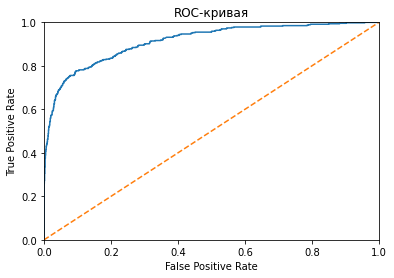

In [93]:
# ROC-кривая или кривая ошибок 

# функция создания кривой ошибок
fpr, tpr, thresholds = roc_curve(target_test, predictions_test)

# построение графика
plt.figure()
plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
# < примение функции plt.xlim() и plt.ylim(), чтобы
#   установить границ осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# < применение функции plt.xlabel() и plt.ylabel(), чтобы
#   подписать оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# < добавление к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC-кривая')
plt.show()

Значение показателя roc-auc на тестовых данных сопоставимо с результатом на обучающей выборке и составляет 0.91 (при теоретическом максимуме 1.1 и случайном результате 0.5). Что удовлетворяет требованиям проекта.

Для модели, которая всегда отвечает случайно, ROC-кривая выглядит как прямая, идущая из левого нижнего угла в верхний правый. Чем график выше, тем больше значение TPR и лучше качество модели.

In [94]:
# расчет дополнительной метрики качества accuracy на тестовых данных

predictions_test_acc = grid_cbc.best_estimator_.predict(features_test)

accuracy = accuracy_score(target_test, predictions_test_acc) 
print('Accuracy (точность модели) на тестовых данных:', accuracy)

Accuracy (точность модели) на тестовых данных: 0.8835888699602499


/opt/conda/lib/python3.9/site-packages/catboost/core.py:1171: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, pairs, weight, group_id, group_weight, subgroup_id, pairs_weight, baseline, timestamp, feature_names, thread_count)


Значение показателя accuracy на тестовых данных составило 0.88.

Значение обеих метрик качества тем лучше, чем выше значение.

Метрика accuracy обычно более понятна для заказчика и бизнес подразделений. В нашем случае модель предсказывает уход клиента с точностью 88%. Но эта метрика не учитывает дисбаланс классов, который у нас есть (действующих клиентов больше, чем ушедших). Эту метрику можно учитывать как дополнительную. 

Одним из способов оценить модель в целом, не привязываясь к конкретному порогу, является AUC-ROC (или ROC AUC) — площадь (Area Under Curve) под кривой ошибок (Receiver Operating Characteristic curve ). Данная кривая представляет из себя линию от (0,0) до (1,1) в координатах True Positive Rate (TPR) и False Positive Rate (FPR). TPR - это полнота, а FPR показывает, какую долю из объектов negative класса алгоритм предсказал неверно. В идеальном случае, когда классификатор не делает ошибок (FPR = 0, TPR = 1) мы получим площадь под кривой, равную единице; в противном случае, когда классификатор случайно выдает вероятности классов, AUC-ROC будет стремиться к 0.5, так как классификатор будет выдавать одинаковое количество TP и FP.
Каждая точка на графике соответствует выбору некоторого порога. Площадь под кривой в данном случае показывает качество алгоритма (больше — лучше), кроме этого, важной является крутизна самой кривой — мы хотим максимизировать TPR, минимизируя FPR, а значит, наша кривая в идеале должна стремиться к точке (0,1).

Метрика качества roc-auc учитывает дисбаланс классов и на тестовой выборке составляет 0.91. Что означает вероятность того, что случайно выбранный positive объект будет проранжирован классификатором значительно выше (будет иметь более высокую вероятность быть positive), чем случайно выбранный negative объект (0.91 против 0.5, максимум 1.1).

### Наиболее значимые признаки модели

In [95]:
# построение confusion матрицы
confusion_matrix(target_test, predictions_test_acc)

array([[1232,   62],
       [ 143,  324]])

[Text(0, 0.5, 'True positive'), Text(0, 1.5, 'False')]

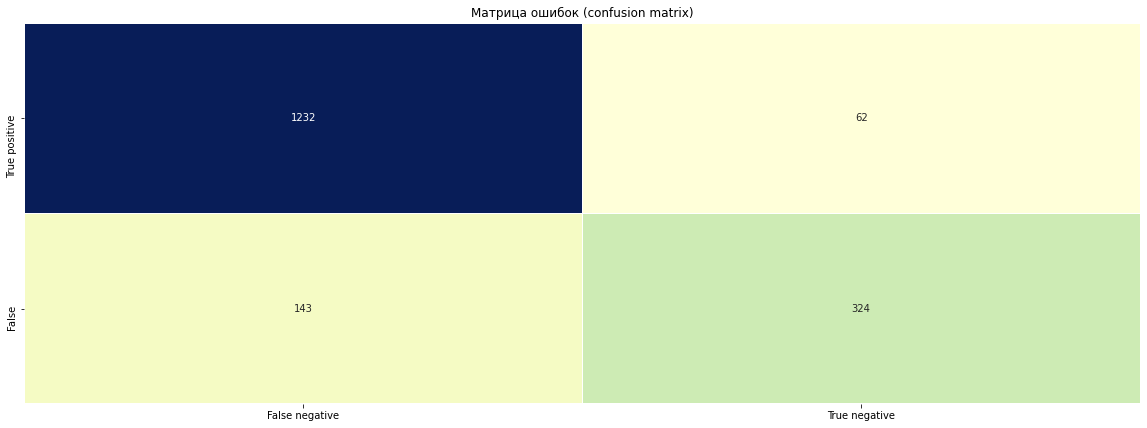

In [96]:
# визуализация confusion матрицы
plt.figure(figsize=(20,7))
fx=sns.heatmap(confusion_matrix(target_test, predictions_test_acc), annot=True, fmt='g', cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
fx.set_title('Матрица ошибок (confusion matrix)')

fx.xaxis.set_ticklabels(['False negative', 'True negative'])
fx.yaxis.set_ticklabels(['True positive', 'False'])

True positive составляет 1232 и True negative 324. Доля правильных ответов существенно превышает долю ложно отрицательных и ложно положительных ответов.

In [97]:
# вывод названий всех признаков
display(features.columns)

Index(['senior_citizen', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines', 'period_of_use'],
      dtype='object')

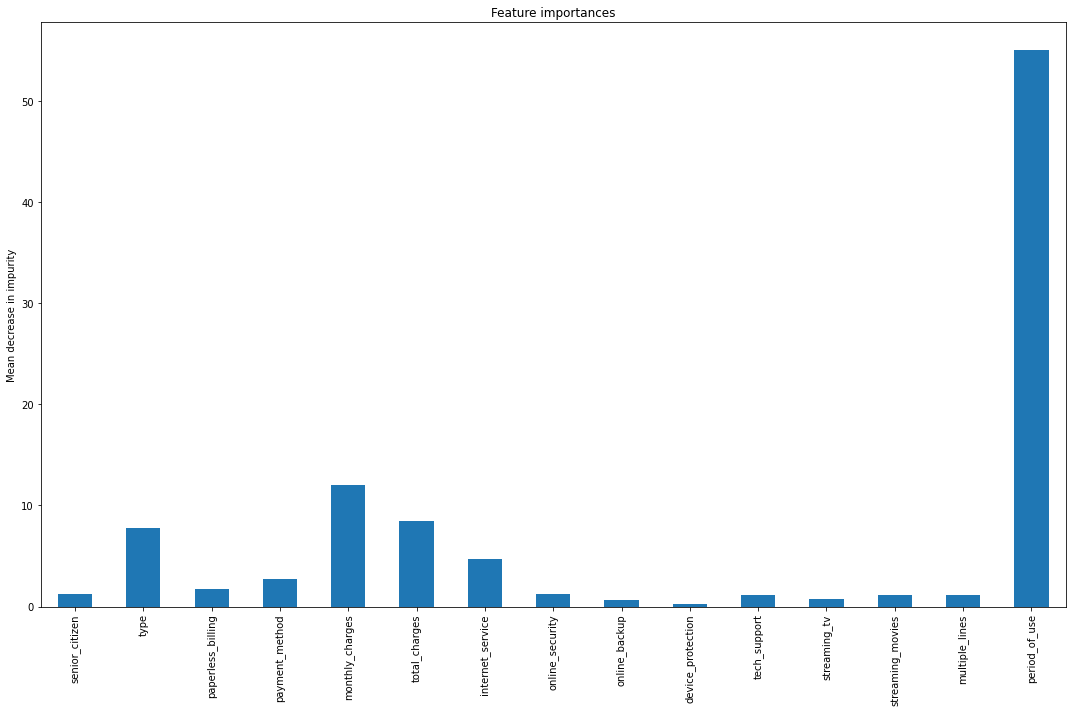

In [98]:
# вывод наиболее значимых признаков (факторов) модели
importances = grid_cbc.best_estimator_.feature_importances_

model_importances = pd.Series(importances, index=features.columns)

fig, ax = plt.subplots(figsize=(15,10))
model_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Исходя из имеющихся данных для анализа наиболее существенным фактором для прогноза ухода клиента является признак 'period_of_use' (период пользования услугами, период действия контракта).

Также значимыми признаками были 'type', 'payment_method', 'monthly_charges', 'total_charges', 'internet_service'.

## Общий вывод

Целью проекта было подготовить модель прогнозирования оттока клиентов для оператора связи. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. 

Обучение и выбор модели производился на исторических данных. Как оценка результата выступало достижение показателя roc-auc не менее 0.85.

Для анализа использовался датасет с поведением клиентов с 2013 года и по состоянию на 01.02.2020. Была проведена предобработка, прямое кодирование и стандартизация данных. Данные были разделены на две выборки: обучающую и тестовую в размере 75:25. Также был осуществлен исследовательский анализ данных по выявлению зависимостей и определения признаков для моделирования.

В проекте решалась задача классификации. Было выбрано четрые модели для обучения (две простые модели и две бустинговые) и сравнения по метрике roc-auc. В данных наблюдается дисбаланс классов (действующий клиентов больше, чем ушедших в сооношении 73 : 26 проценто), но выбранная метрика качества менее чувствительна к дисбалансу.

По результатам анализа оптимальной выбрана модель классификации CatBoost с параметрами {'depth': 5, 'iterations': 200, 'learning_rate': 0.3}. Значение показателя roc-auc модели на тестовой выборке составляет 0.91 (точность полученной модели существенно выше случайной). Точность модели на тестовых данных составляет 88%.

Дополнительно хочется отметить, что наблюдается существенный уход клиентов с 2019-10-01. Данные об уходе есть только за 3 месяца 2019 года и 1 месяц 2020 года. При этом на данном этапе анализа нет информации по какой причине. В ходе исследовательского анализа существенных зависимостей между данными клиентов и причинами ухода не выявлено, но причину можно предположить:

- не собирали ранее данные по дате ухода клиентов, а стали собирать только с 01.10.2019,
- появились новые конкуренты или проводилась активная маркетинговая компания у конкурентов, к которым перешла часть клиентов,
- в компании были какие-то изменения или по ценовой политике / тарифам или по маркетинговой стратегии или были технические изменения, которые могли повлечь за собой сбои связи / интернета.

Для целей уточнения признаков модели и разработки маркетинговой стратегии компании рекомендуется уточнить, какое событие или события произошли в октябре 2019.

## Отчет по проекту прогнозирования оттока клиентов для оператора связи 

Целью проекта было подготовить модель прогнозирования оттока клиентов для оператора связи со значением метрики качества roc-auc не менее 0.85. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. 

Обучение модели производилось на исторических данных. Выбор модели производился по результирующей метрике качества roc-auc. Для анализа использовался датасет с поведением клиентов с 2013 года и по состоянию на 01.02.2020.

**Для целей достижения цели проекта был составлен план и были поставлены следующие задачи:**

1.	Загрузить данные и изучить общую информацию о датасете;

2.	Проанализировать данные, предварительно определить признаки для моделирования;

3.  Провести предобработку данных;

4.  Провести исследовательский анализ данных, в том числе проверить зависимости между данными, проверить гипотезы;

5.  Определить метрику(и) качества для оценки и выбора оптимальной модели;

6.  Подготовить данные для моделирования (объединить таблицы, оставить признаки и таргет, провести масштабирование и кодирование данных);

7.	Обучить разные модели с различными гиперпараметрами;

8.  Выбрать оптимальную модель, исходя из получившихся значений метрики качества;

9.	Проверить работу оптимальной модели на тестовой выборке, сравнить с константной моделью и сделать выводы;

10. Выводы, предложения, рекомендации.

По итогам выполнения проекта удалось выполнить все пункты плана. 
 

**Ключевые шаги в решении задачи следующие:**

Первым этапом проведена предобработка данных (приведение типов данных в соответствие, приведение названий столбцов таблиц к snake_case, работа с дубликатами, объединение таблиц, заполнение пропущенных значений, создание столбца с целевым признаком: 1 - клиент ушел, 0 - клиент остался).

Существенную долю проекта заняло проведение исследовательского анализа данных по выявлению зависимостей между данными, проверке гипотез и определению признаков для моделирования.

В рамках анализа был создан расчетный синтетический столбец с указанием периода пользования услугами в днях.

Столбец monthly_charges имеет выбросы в данных. Наблюдается пик количества клиентов по месячным расходам в промежутке от 10 до 30 у.е., а далее спад. Распределение остальных клиентов после спада стремится к нормальному. Предположительно это связано с тем, что часть клиентов пользуется услугами только месяц и не продлевает далее контракт.

Дата начала использования (begin_date) не имеет нормального распределения. Вероятно подключение к услугам по годам зависит от маркетинговой политики компании и предложений конкурентов.

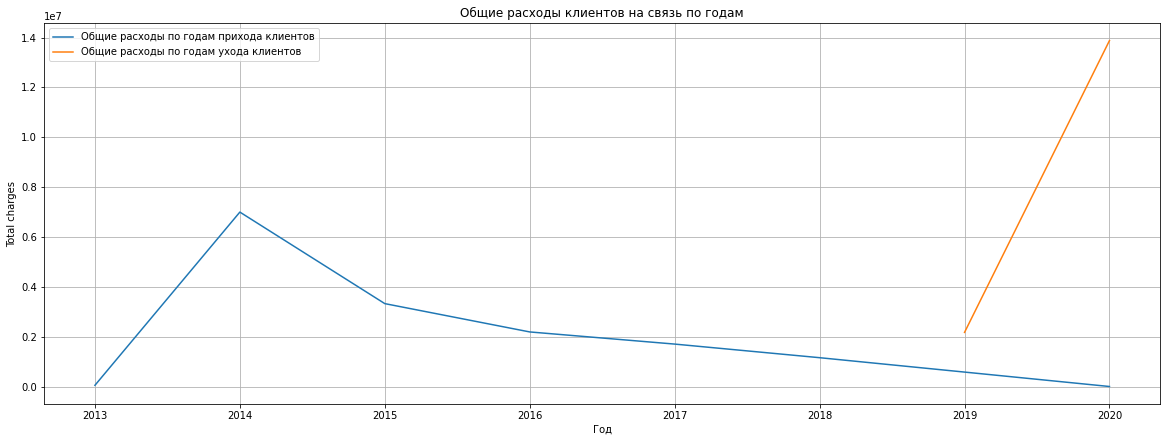

Наблюдается существенный уход клиентов с 01.10.2019.

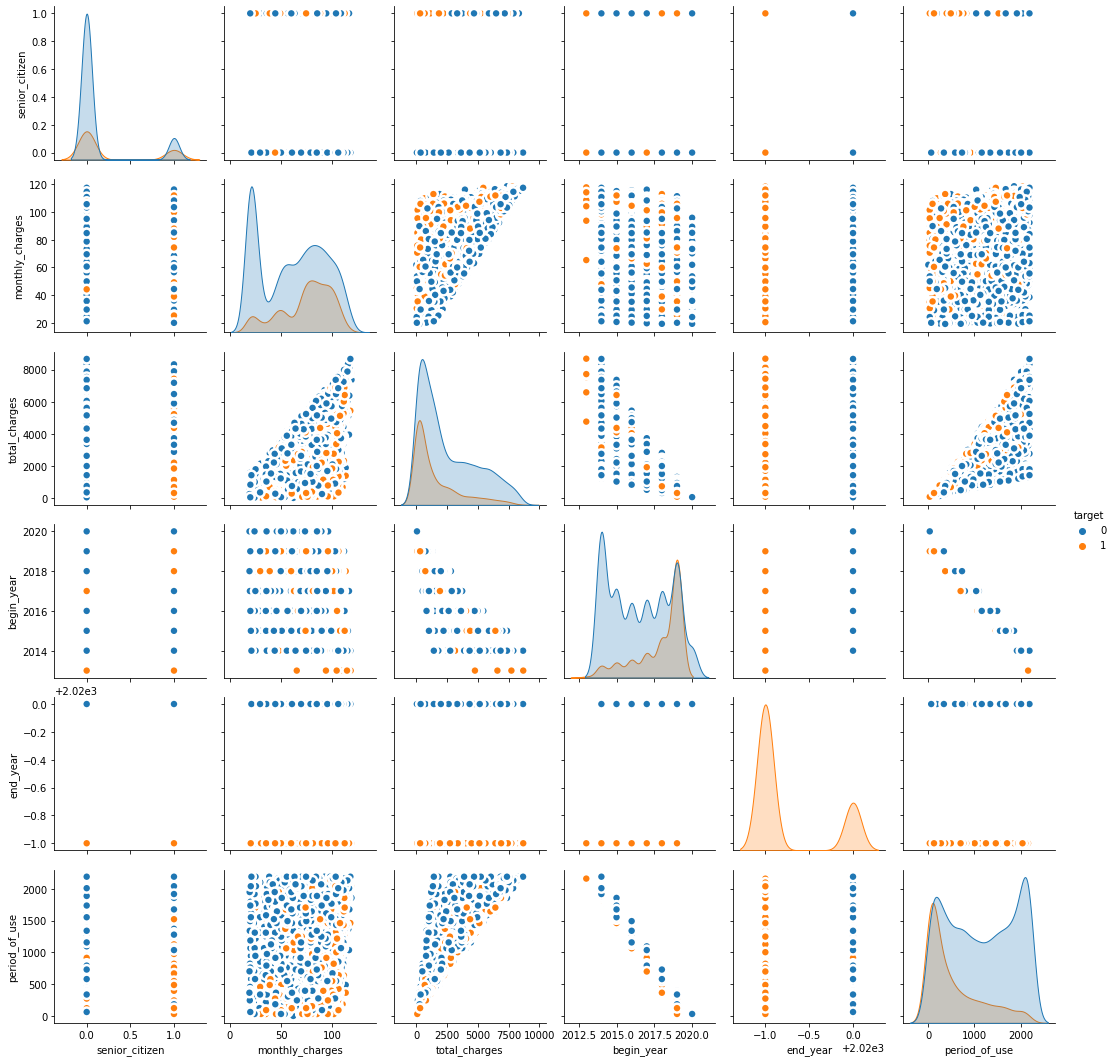

На графике выше представлена визуализация взаимосвязи между всеми возможными парами числовых переменных. По диагонали на пересечении идет сравнение столбца с самим собой, эти связи не требуют анализа. На этом графике каких-то явных взаимосвязей и тем более возможных причин ухода клиентов не прослеживается. В выводах компании заказчику будет рекомендовано уточнить дополнительные факторы, внешние и внутренние, которые произошли в компании 01.10.2019.

В рамках анализа не быда выявлена взаимосвязь ушедших клиентов от пола (gender). Столбец dependents коррелировал со столбцом partner. Для построения модели бинарной классификации не подходят все столбцы с датой (кроме синтетического столбца с периодом использования), чтобы они не коррелировали с целевой переменной и не происходила утечка данных.

После проведения исследовательского анализа и выбора признаков для моделирования датасет был разделен на две выборки: обучающую и тестовую в размере 75:25. Так как значение целевого признака было распределено неравномерно (наблюдался дисбаланс классов в пользу действующих клиентов), то при разделении на выборки применялась стратификация.
Далее было осуществлено прямое кодирование и стандартизация данных.

В проекте решалась задача классификации. Было выбрано четрые модели для обучения. Две простые модели: Логистическая регрессия и Случайный лес. И две бустинговые модели: CatBoost и LightGBM. В данных наблюдается дисбаланс классов. Стоит отметить, что метрика оценки качества модели ROC-AUC нечувствительна к дисбалансу, поэтому принято решение не балансировать классы, но при разделении данных на выборки применялась стратификация.

**Какие признаки использовали для обучения модели и какая предобработка этих признаков была выполнена:**

Признаки, которые использовались для моделирования:

'senior_citizen', 'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines', 'period_of_use'

Количественные признаки были стандартизированы с помощью инструмента StandardScaler. 

Работа по унификации категориальных признаков производилась в несколько этапов в зависимости от типа модели. Для линейных моделей (в нашем случае Логистическая регрессия) применялся интрумент OHE (OneHotEncoder). Для деревянных моделей (в нашем случае Случайный лес) использовался интрумент OE (OrdinalEncoder). В модели CatBoost используется встроенный кодировщик, дополнительное кодирование категориальных признаков не требуется. Таким образом категориальные признаки кодировались два раза двумя разными инструментами и для каждой модели использовать свой инструмент.

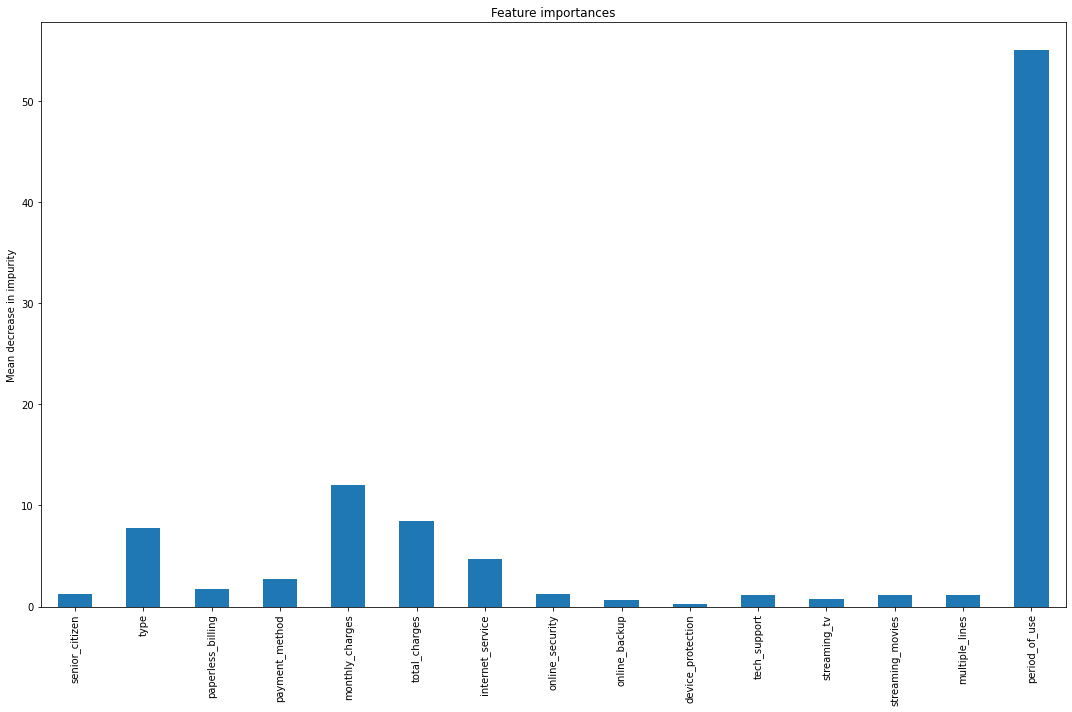

Исходя из имеющихся данных для анализа наиболее существенным фактором для прогноза ухода клиента является признак 'period_of_use' (период пользования услугами, период действия контракта).

Также значимыми признаками были 'type', 'payment_method', 'monthly_charges', 'total_charges', 'internet_service'.

**Итоговая модель, какие у неё гиперпараметы и какое качество:**

По результатам анализа оптимальной выбрана модель классификации CatBoost с параметрами {'depth': 5, 'iterations': 200, 'learning_rate': 0.3}. Значение показателя roc-auc модели на тестовой выборке составляет 0.91 (при теоретическом максимуме 1.1 и случайном результате 0.5). Что удовлетворяет требованиям проекта. Точность модели по дополнительной метрике accuracy на тестовых данных составляет 88%.

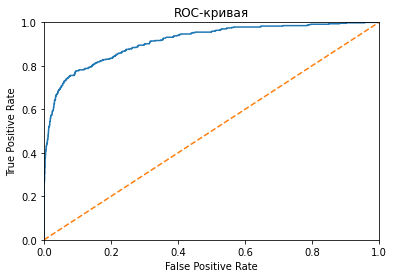

**Какие трудности возникли и как их можно преодолеть:**

Дополнительно хочется отметить, что наблюдается существенный уход клиентов с 01.10.2019. Данные об уходе есть только за 3 месяца 2019 года и 1 месяц 2020 года. При этом на данном этапе анализа нет информации по какой причине. В ходе исследовательского анализа существенных зависимостей между данными клиентов и причинами ухода не выявлено, но причину можно предположить:

- не собирали ранее данные по дате ухода клиентов, а стали собирать только с 01.10.2019,
- появились новые конкуренты или проводилась активная маркетинговая компания у конкурентов, к которым перешла часть клиентов,
- в компании были какие-то изменения или по ценовой политике / тарифам или по маркетинговой стратегии или были технические изменения, которые могли повлечь за собой сбои связи / интернета.

Для целей уточнения признаков модели и разработки маркетинговой стратегии компании рекомендуется уточнить, какое событие или события произошли в октябре 2019.

**Итоговый вывод и рекомендации:**

Модель прогнозирования оотока клиентов подготовлена с хорошей метрикой качества. Выбрана модель классификации CatBoost с параметрами {'depth': 5, 'iterations': 200, 'learning_rate': 0.3}. Значение показателя roc-auc модели на тестовой выборке составляет 0.91 (при теоретическом максимуме 1.1 и случайном результате 0.5). 

Компании заказчику рекомендуется использовать модель в рамках проведения маркетинговой стратегии.

Но для выявления более точных клиентских потребностей и, как следствие, для целей уточнения признаков модели и маркетинговой стратегии, компании рекомендуется уточнить, какое событие или события произошли в октябре 2019. И далее вернутся к уточнению модели прогноза.